This work was performed in a virtual enviroment. All the requirements were installed in the environment.

In [2]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Property Prices dataset

In [3]:
df = pd.read_csv('../../DATA/PPR-ALL.csv', usecols=['Date of Sale (dd/mm/yyyy)', 'Address', 'County', 'Price (�)', 
                                          'VAT Exclusive', 'Not Full Market Price', 'Description of Property'])

In [4]:
df.head()

,Date of Sale (dd/mm/yyyy),Address,County,Price (�),Not Full Market Price,VAT Exclusive,Description of Property
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,"�343,000.00",No,No,Second-Hand Dwelling house /Apartment
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,"�185,000.00",No,Yes,New Dwelling house /Apartment
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,"�438,500.00",No,No,Second-Hand Dwelling house /Apartment
3,04/01/2010,"1 The Haven, Mornington",Meath,"�400,000.00",No,No,Second-Hand Dwelling house /Apartment
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,"�160,000.00",No,No,Second-Hand Dwelling house /Apartment


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478742 entries, 0 to 478741
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Date of Sale (dd/mm/yyyy)  478742 non-null  object
 1   Address                    478742 non-null  object
 2   County                     478742 non-null  object
 3   Price (�)                  478742 non-null  object
 4   Not Full Market Price      478742 non-null  object
 5   VAT Exclusive              478742 non-null  object
 6   Description of Property    478742 non-null  object
dtypes: object(7)
memory usage: 25.6+ MB


In [6]:
df['County'].unique()

array(['Dublin', 'Laois', 'Meath', 'Kilkenny', 'Limerick', 'Carlow',
       'Cork', 'Clare', 'Sligo', 'Cavan', 'Tipperary', 'Wicklow',
       'Roscommon', 'Wexford', 'Mayo', 'Donegal', 'Longford', 'Galway',
       'Offaly', 'Kildare', 'Waterford', 'Louth', 'Kerry', 'Westmeath',
       'Monaghan', 'Leitrim'], dtype=object)

In [9]:
df['Description of Property'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment', 'Teach/�ras�n C�naithe Ath�imhe',
       'Teach/�ras�n C�naithe Nua', 'Teach/?ras?n C?naithe Nua'],
      dtype=object)

The preliminary exploration of the dataset shows several issues that have to be addressed later: removing the '?' symbol in the price column and converting all values to numeric type, converting the dates to datetime, and correcting the strange values in 'Description of Property'.

#### Loading Residential Price Index (RPI) dataset

In [10]:
df2 = pd.read_csv('../../DATA/HPM09.20210623T140615.csv')

In [11]:
df2.head()

,Statistic,Month,Type of Residential Property,UNIT,VALUE
0,Residential Property Price Index,2005M01,National - all residential properties,Base 2015=100,124.9
1,Residential Property Price Index,2005M01,National - houses,Base 2015=100,120.7
2,Residential Property Price Index,2005M01,National - apartments,Base 2015=100,153.4
3,Residential Property Price Index,2005M01,Dublin - all residential properties,Base 2015=100,118.5
4,Residential Property Price Index,2005M01,Dublin - houses,Base 2015=100,112.0


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15680 entries, 0 to 15679
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Statistic                     15680 non-null  object 
 1   Month                         15680 non-null  object 
 2   Type of Residential Property  15680 non-null  object 
 3   UNIT                          15680 non-null  object 
 4   VALUE                         12720 non-null  float64
dtypes: float64(1), object(4)
memory usage: 612.6+ KB


In [13]:
df2.isnull().sum()

Statistic                          0
Month                              0
Type of Residential Property       0
UNIT                               0
VALUE                           2960
dtype: int64

In [14]:
df2['Statistic'].unique()

array(['Residential Property Price Index',
       'Percentage Change over 1 month for Residential Property Price Index',
       'Percentage Change over 3 months for Residential Property Price Index',
       'Percentage Change over 12 months for Residential Property Price Index'],
      dtype=object)

In [15]:
df2['Type of Residential Property'].unique()

array(['National - all residential properties', 'National - houses',
       'National - apartments', 'Dublin - all residential properties',
       'Dublin - houses', 'Dublin - apartments', 'Dublin City - houses',
       'Dun Laoghaire-Rathdown - houses', 'Fingal - houses',
       'South Dublin - houses',
       'National excluding Dublin - all residential properties',
       'National excluding Dublin - houses',
       'National excluding Dublin - apartments', 'Border - houses',
       'Midland - houses', 'West - houses', 'Mid-East - houses',
       'Mid-West - houses', 'South-East - houses', 'South-West - houses'],
      dtype=object)

In [16]:
df2['UNIT'].unique()

array(['Base 2015=100', '%'], dtype=object)

#### Cleaning Property Prices dataset

In [17]:
df['Date of Sale (yyyy-mm-dd)'] = pd.to_datetime(df['Date of Sale (dd/mm/yyyy)'], format='%d/%m/%Y')

The new date format is set automatically to 'yyyy-mm-dd'.

In [18]:
df = df.drop('Date of Sale (dd/mm/yyyy)', axis=1)

In [19]:
df.head()

,Address,County,Price (�),Not Full Market Price,VAT Exclusive,Description of Property,Date of Sale (yyyy-mm-dd)
0,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,"�343,000.00",No,No,Second-Hand Dwelling house /Apartment,2010-01-01
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,"�185,000.00",No,Yes,New Dwelling house /Apartment,2010-01-03
2,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,"�438,500.00",No,No,Second-Hand Dwelling house /Apartment,2010-01-04
3,"1 The Haven, Mornington",Meath,"�400,000.00",No,No,Second-Hand Dwelling house /Apartment,2010-01-04
4,"11 Melville Heights, Kilkenny",Kilkenny,"�160,000.00",No,No,Second-Hand Dwelling house /Apartment,2010-01-04


Check the date format is as expected:

In [20]:
df.loc[1, 'Date of Sale (yyyy-mm-dd)'].day

3

In [21]:
df.loc[1, 'Date of Sale (yyyy-mm-dd)'].month

1

In [22]:
df.loc[1, 'Date of Sale (yyyy-mm-dd)'].year

2010

Filter by date:

In [23]:
df = df[(df['Date of Sale (yyyy-mm-dd)'].dt.year >= 2010)&(df['Date of Sale (yyyy-mm-dd)'].dt.year <= 2019)]

In [24]:
len(df)

408681

Filter by county:

In [25]:
df = df[df['County'].isin(['Dublin', 'Cork', 'Galway', 'Kildare', 'Meath'])]

In [26]:
df['County'].unique()

array(['Dublin', 'Meath', 'Cork', 'Galway', 'Kildare'], dtype=object)

In [27]:
len(df)

234266

Remove the '?' symbol from the price column name:

In [28]:
df = df.rename(columns = {'Price (�)':'Price (Euro)'})

Remove the '?' symbol from the price values and convert to a float type:

In [29]:
df['Price (Euro)'] = df['Price (Euro)'].apply(lambda x: float(x.replace('�', '').replace(',', '')))

In [30]:
df['Price (Euro)'].median()

248000.0

In [31]:
df['Description of Property'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment', 'Teach/�ras�n C�naithe Ath�imhe',
       'Teach/?ras?n C?naithe Nua', 'Teach/�ras�n C�naithe Nua'],
      dtype=object)

In [32]:
((df['Description of Property']!='Second-Hand Dwelling house /Apartment')&(df['Description of Property']!='New Dwelling house /Apartment')).sum()

22

In [33]:
22/len(df)

9.391034123603083e-05

In [34]:
df[(df['Description of Property']!='Second-Hand Dwelling house /Apartment')&(df['Description of Property']!='New Dwelling house /Apartment')]

,Address,County,Price (Euro),Not Full Market Price,VAT Exclusive,Description of Property,Date of Sale (yyyy-mm-dd)
12752,"8 Millhill Park, Skerries.",Dublin,320000.00,No,No,Teach/�ras�n C�naithe Ath�imhe,2010-08-20
26799,"12 Southdene, Gleann Bhaile Na Manach, Baile N...",Dublin,272000.00,No,No,Teach/�ras�n C�naithe Ath�imhe,2011-05-27
39784,"Apartment 12 Block B, Corofin House Clare Vi...",Dublin,115045.00,No,Yes,Teach/?ras?n C?naithe Nua,2012-01-12
48875,"7 Thorndale Grove, Artane, Dublin.",Dublin,250000.00,No,No,Teach/�ras�n C�naithe Ath�imhe,2012-06-28
53996,"121 Ardilaun, Portmarnock, Co Dublin.",Dublin,375000.00,No,No,Teach/�ras�n C�naithe Ath�imhe,2012-09-10
59632,"104 Shandon Park, Phibsborough, Dublin 7",Dublin,290000.00,No,No,Teach/�ras�n C�naithe Ath�imhe,2012-11-22
61711,"58 Bunbury Gate Crescent, Swords, Co. Dublin",Dublin,325000.00,No,No,Teach/�ras�n C�naithe Ath�imhe,2012-12-11
62128,"187 Vernon Avenue, Clontarf",Dublin,440000.00,No,No,Teach/�ras�n C�naithe Ath�imhe,2012-12-14
71735,"23 Riversdale Court, Monkstown",Dublin,315000.00,No,No,Teach/�ras�n C�naithe Ath�imhe,2013-05-03
77259,"87 B�thar an Bhreatnaigh, Droim Conrach, B.�.C 3",Dublin,198000.00,No,No,Teach/�ras�n C�naithe Ath�imhe,2013-07-16


There are 22 entries whose 'Description of property' is not clear. However, we can deduce the true label from the 'VAT Exclusive' column. The price of any new property is VAT Exclusive, while for any second-hand property it is not. Also the word 'Nua' probably stands for 'New'. We replace the misspelled values with the correct ones:

In [35]:
df = df.replace(['Teach/�ras�n C�naithe Nua', 'Teach/?ras?n C?naithe Nua'], 'New Dwelling house /Apartment')

In [36]:
df = df.replace(['Teach/�ras�n C�naithe Ath�imhe'], 'Second-Hand Dwelling house /Apartment')

In [37]:
df['Description of Property'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment'], dtype=object)

In [38]:
df['Description of Property'].value_counts()

Second-Hand Dwelling house /Apartment    191444
New Dwelling house /Apartment             42822
Name: Description of Property, dtype: int64

All houses have the same VAT which is $13.5$%. For old houses it is included in the price shown, but for new houses it is not (the price shown is VAT exclusive). Therefore, in order to compare them directly, we have to add the VAT to the new houses by multiplying the price by $1.135$. We thus create a new column 'Price with VAT'.

In [39]:
def find_price_with_vat(price, vat_exclusive):
    if vat_exclusive == 'No':
        return price
    elif vat_exclusive == 'Yes':
        return price * 1.135

In [40]:
df.loc[:, 'Price with VAT'] = df.apply(lambda x: find_price_with_vat(x['Price (Euro)'], x['VAT Exclusive']), axis=1)

In [41]:
df.head()

,Address,County,Price (Euro),Not Full Market Price,VAT Exclusive,Description of Property,Date of Sale (yyyy-mm-dd),Price with VAT
0,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-01,343000.0
2,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,438500.0
3,"1 The Haven, Mornington",Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,400000.0
5,"12 Sallymount Avenue, Ranelagh",Dublin,425000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,425000.0
8,"15 Carriglawn, Waterpark, Carrigaline",Cork,180000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,180000.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234266 entries, 0 to 408678
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Address                    234266 non-null  object        
 1   County                     234266 non-null  object        
 2   Price (Euro)               234266 non-null  float64       
 3   Not Full Market Price      234266 non-null  object        
 4   VAT Exclusive              234266 non-null  object        
 5   Description of Property    234266 non-null  object        
 6   Date of Sale (yyyy-mm-dd)  234266 non-null  datetime64[ns]
 7   Price with VAT             234266 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 16.1+ MB


#### Cleaning Residential Price Index (RPI) dataset

In [43]:
df2['Date (yyyy-mm-dd)'] = pd.to_datetime(df2['Month'], format='%YM%m')

In [44]:
df2 = df2.drop('Month', axis=1)

In this dataframe only the year and the month are known, so the day is set to '01' for all entries.

In [45]:
df2.head()

,Statistic,Type of Residential Property,UNIT,VALUE,Date (yyyy-mm-dd)
0,Residential Property Price Index,National - all residential properties,Base 2015=100,124.9,2005-01-01
1,Residential Property Price Index,National - houses,Base 2015=100,120.7,2005-01-01
2,Residential Property Price Index,National - apartments,Base 2015=100,153.4,2005-01-01
3,Residential Property Price Index,Dublin - all residential properties,Base 2015=100,118.5,2005-01-01
4,Residential Property Price Index,Dublin - houses,Base 2015=100,112.0,2005-01-01


Filter based on date:

In [46]:
df2 = df2[(df2['Date (yyyy-mm-dd)'].dt.year >= 2010)&(df2['Date (yyyy-mm-dd)'].dt.year <= 2019)]

In [47]:
len(df2)

9600

Keep only the RPPI statistic:

In [48]:
df2 = df2[df2['Statistic']=='Residential Property Price Index']

In [49]:
len(df2)

2400

Filter based on 'Type of Residential Property':

In [50]:
df2 = df2[df2['Type of Residential Property'].isin(['Dublin - all residential properties', 
                                                   'National excluding Dublin - all residential properties'])]

In [51]:
len(df2)

240

This makes sense: 10 years $\times$ 12 months $\times$ 2 regions = 240 rows

In [52]:
df2

,Statistic,Type of Residential Property,UNIT,VALUE,Date (yyyy-mm-dd)
1203,Residential Property Price Index,Dublin - all residential properties,Base 2015=100,96.1,2010-01-01
1210,Residential Property Price Index,National excluding Dublin - all residential pr...,Base 2015=100,135.3,2010-01-01
1223,Residential Property Price Index,Dublin - all residential properties,Base 2015=100,93.9,2010-02-01
1230,Residential Property Price Index,National excluding Dublin - all residential pr...,Base 2015=100,133.7,2010-02-01
1243,Residential Property Price Index,Dublin - all residential properties,Base 2015=100,91.8,2010-03-01
...,...,...,...,...,...
3550,Residential Property Price Index,National excluding Dublin - all residential pr...,Base 2015=100,147.0,2019-10-01
3563,Residential Property Price Index,Dublin - all residential properties,Base 2015=100,125.6,2019-11-01
3570,Residential Property Price Index,National excluding Dublin - all residential pr...,Base 2015=100,146.8,2019-11-01
3583,Residential Property Price Index,Dublin - all residential properties,Base 2015=100,123.6,2019-12-01


In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 1203 to 3590
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Statistic                     240 non-null    object        
 1   Type of Residential Property  240 non-null    object        
 2   UNIT                          240 non-null    object        
 3   VALUE                         240 non-null    float64       
 4   Date (yyyy-mm-dd)             240 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 11.2+ KB


In [54]:
df2.isnull().sum()

Statistic                       0
Type of Residential Property    0
UNIT                            0
VALUE                           0
Date (yyyy-mm-dd)               0
dtype: int64

Check that the mean RPPI value for 2015 is 100 (this is part of the definition of RPPI).

In [55]:
df2[(df2['Date (yyyy-mm-dd)'].dt.year==2015)]['VALUE'].mean()

99.99166666666666

In [56]:
df2[(df2['Date (yyyy-mm-dd)'].dt.year==2015)]['VALUE'].std()

3.027542649204735

#### Combining the two datasets

The valuable information from the second table is the value of the Residential Property Price Index (RPPI). We want to attach that to the first table. Therefore, for each entry in the first table we have to check the County (is the property in Dublin or outside Dublin?) and the Date of Sale, and then look up the relevant index from the second table. Thus we create an extra column in the first table called 'RPPI'.

In [57]:
def find_rppi(county, date_of_sale):
    """A function that takes as input the county of a property and the date of sale and returns the RPPI
    of the property from df2."""
    #The date in the second table is given by the first day of the month, so we need to extract that.
    first_day_of_month = date_of_sale.replace(day=1)
    # Condition based on whether the county is Dublin or not
    if county == 'Dublin':
        return df2[(df2['Type of Residential Property']=='Dublin - all residential properties')
           &(df2['Date (yyyy-mm-dd)']==first_day_of_month)]['VALUE'].iloc[0]
    else:
        return df2[(df2['Type of Residential Property']=='National excluding Dublin - all residential properties')
           &(df2['Date (yyyy-mm-dd)']==first_day_of_month)]['VALUE'].iloc[0]

In [58]:
# Running this takes a few minutes
df.loc[:, 'RPPI'] = df.apply(lambda x: find_rppi(x['County'], x['Date of Sale (yyyy-mm-dd)']), axis=1)

In [59]:
df.head()

,Address,County,Price (Euro),Not Full Market Price,VAT Exclusive,Description of Property,Date of Sale (yyyy-mm-dd),Price with VAT,RPPI
0,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-01,343000.0,96.1
2,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,438500.0,96.1
3,"1 The Haven, Mornington",Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,400000.0,135.3
5,"12 Sallymount Avenue, Ranelagh",Dublin,425000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,425000.0,96.1
8,"15 Carriglawn, Waterpark, Carrigaline",Cork,180000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,180000.0,135.3


There are two sources for the variation of the price of houses. The first is pure change with time, arising from external factors related to the economy. This is captured by the RPPI. The second is variation between different apartments due to their quality and internal characteristics - location, size, age, refurbishment, etc. We can capture the second source of variation if we compare the prices of the apartments at the same time, say at December 2019, the last month of the data available.

In [60]:
# Find the RPPI in and outside Dublin for December, 2019
df2[(df2['Date (yyyy-mm-dd)'].dt.month == 12) & (df2['Date (yyyy-mm-dd)'].dt.year == 2019)]

,Statistic,Type of Residential Property,UNIT,VALUE,Date (yyyy-mm-dd)
3583,Residential Property Price Index,Dublin - all residential properties,Base 2015=100,123.6,2019-12-01
3590,Residential Property Price Index,National excluding Dublin - all residential pr...,Base 2015=100,145.9,2019-12-01


In [61]:
rppi_Dec2019_Dublin = 123.6
rppi_Dec2019_national = 145.9

The pure percentage change (coming from economy, not internal characteristics) is given by $\frac{I_{c} - I_{p}}{I_{p}} \times 100 \%$, where $I_{p}$ is the past RPPI and $I_{c}$ is the new RPPI. The current price is therefore given by:
\begin{equation}
P_c = P_p + \frac{I_{c} - I_{p}}{I_{p}} P_p = \frac{I_c}{I_p} P_p
\end{equation}
Therefore for any given entry we need to look at its sale price including VAT (this gives $P_p$), its RPPI (this gives $I_p$) and its county (in order to decide whether to use $I_c = 123.6$ if it is in Dublin or $I_c = 145.9$ if it is outside Dublin). Then we use the above formula to estimate $P_c$ - the price of this estate in December, 2019. First, we give an example with a single entry, and then we do it for all entries, thus creating a new column 'Price at Dec2019'.

In [62]:
df.loc[0]

Address                      5 Braemor Drive, Churchtown, Co.Dublin
County                                                       Dublin
Price (Euro)                                               343000.0
Not Full Market Price                                            No
VAT Exclusive                                                    No
Description of Property       Second-Hand Dwelling house /Apartment
Date of Sale (yyyy-mm-dd)                       2010-01-01 00:00:00
Price with VAT                                             343000.0
RPPI                                                           96.1
Name: 0, dtype: object

In [63]:
np.round_(rppi_Dec2019_Dublin / df.loc[0, 'RPPI'] * df.loc[0, 'Price with VAT'])

441153.0

In [64]:
def find_price_Dec2019(county, rppi, price):
    """Estimate the price of a house in December 2019 given its county, the RPPI and the price."""
    if county == 'Dublin':
        return np.round_(rppi_Dec2019_Dublin / rppi * price)
    else:
        return np.round_(rppi_Dec2019_national / rppi * price)

In [65]:
df.loc[:, 'Price at Dec2019'] = df.apply(lambda x: find_price_Dec2019(x['County'], x['RPPI'], x['Price with VAT']), axis=1)

In [66]:
df.head()

,Address,County,Price (Euro),Not Full Market Price,VAT Exclusive,Description of Property,Date of Sale (yyyy-mm-dd),Price with VAT,RPPI,Price at Dec2019
0,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-01,343000.0,96.1,441153.0
2,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,438500.0,96.1,563981.0
3,"1 The Haven, Mornington",Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,400000.0,135.3,431338.0
5,"12 Sallymount Avenue, Ranelagh",Dublin,425000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,425000.0,96.1,546618.0
8,"15 Carriglawn, Waterpark, Carrigaline",Cork,180000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,180000.0,135.3,194102.0


##### Exploratory Data Analysis

In [67]:
df

,Address,County,Price (Euro),Not Full Market Price,VAT Exclusive,Description of Property,Date of Sale (yyyy-mm-dd),Price with VAT,RPPI,Price at Dec2019
0,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-01,343000.0,96.1,441153.0
2,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,438500.0,96.1,563981.0
3,"1 The Haven, Mornington",Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,400000.0,135.3,431338.0
5,"12 Sallymount Avenue, Ranelagh",Dublin,425000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,425000.0,96.1,546618.0
8,"15 Carriglawn, Waterpark, Carrigaline",Cork,180000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,180000.0,135.3,194102.0
...,...,...,...,...,...,...,...,...,...,...
408669,"3A MIDDLE ST, GALWAY, GALWAY",Galway,175000.0,No,No,Second-Hand Dwelling house /Apartment,2019-12-31,175000.0,145.9,175000.0
408670,"3B MIDDLE ST, GALWAY CITY, GALWAY",Galway,175000.0,No,No,Second-Hand Dwelling house /Apartment,2019-12-31,175000.0,145.9,175000.0
408671,"78 RATOATH AVE, FINGLAS, DUBLIN 11",Dublin,80000.0,No,No,Second-Hand Dwelling house /Apartment,2019-12-31,80000.0,123.6,80000.0
408675,"CLONARD HOUSE, 17 CLONARD RD, CRUMLIN",Dublin,432500.0,No,No,Second-Hand Dwelling house /Apartment,2019-12-31,432500.0,123.6,432500.0


In [68]:
df.describe()

,Price (Euro),Price with VAT,RPPI,Price at Dec2019
count,2.342660e+05,2.342660e+05,234266.000000,2.342660e+05
mean,3.215533e+05,3.295213e+05,108.477900,4.032921e+05
std,9.848934e+05,1.025202e+06,21.345493,1.137164e+06
min,5.030530e+03,5.030530e+03,64.600000,5.136000e+03
25%,1.625000e+05,1.650000e+05,94.200000,2.119020e+05
50%,2.480000e+05,2.523130e+05,107.900000,3.101510e+05
75%,3.524230e+05,3.650839e+05,125.100000,4.417960e+05
max,1.422566e+08,1.614612e+08,147.000000,1.614612e+08


First, we check the number of sales in different counties and of different types.

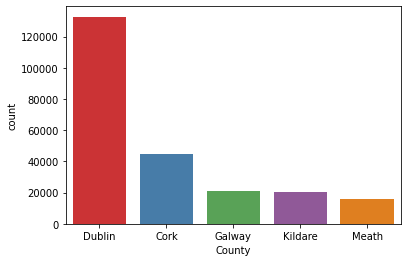

In [70]:
sns.countplot(data=df, x='County', order=df['County'].value_counts().index, palette='Set1');

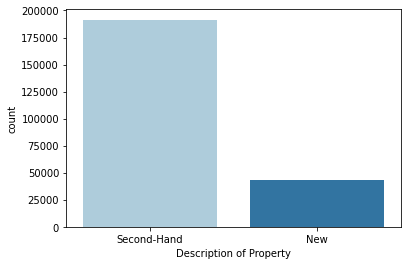

In [71]:
sns.countplot(data=df, x='Description of Property', palette='Paired')

plt.xticks([0,1], labels=['Second-Hand', 'New']);

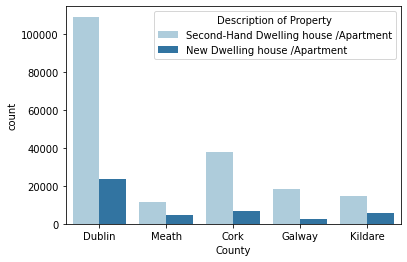

In [72]:
sns.countplot(data=df, x='County', hue='Description of Property', palette='Paired');

Not surprisingly most (about half) of the sales were made in Dublin. For each county, most of the sales were of second-hand property (again quite expected).

Next, we check the median price for different counties and types. We look at the 'bare' prices for December 2019, because we are mostly interested in differences due to the quality of the appartments (differences due to the economic conditions at different places will be captured by time plots of the RPPI shown later). We work with the median because it is not sensitive to outliers (unlike the mean).

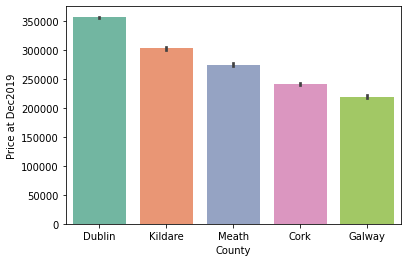

In [76]:
sns.barplot(data=df, x='County', y='Price at Dec2019', estimator=np.median,
           order=df[['County', 'Price at Dec2019']].groupby(['County']).median().sort_values('Price at Dec2019', ascending=False).index,
           palette='Set2');

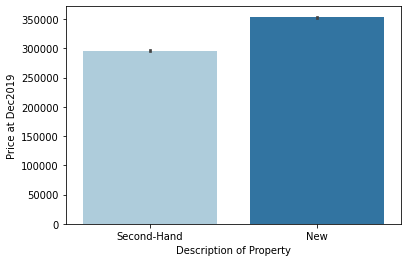

In [77]:
sns.barplot(data=df, x='Description of Property', y='Price at Dec2019', estimator=np.median, palette='Paired')

plt.xticks([0,1], labels=['Second-Hand', 'New']);

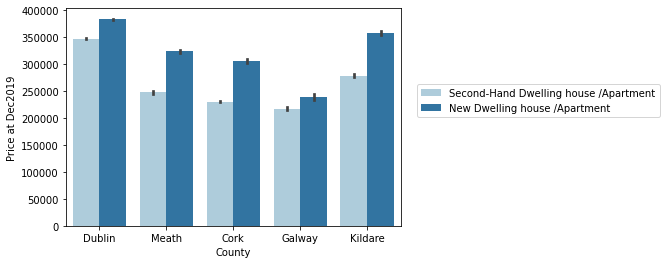

In [79]:
sns.barplot(data=df, x='County', y='Price at Dec2019', estimator=np.median, hue='Description of Property',
           palette='Paired')
plt.legend(loc=(1.05,0.5));

As expected, Dublin is most expensive, and new houses are more expensive than second-hand houses.

Next we want to check the distributions of the prices feature via a histogram. Since the prices span several orders of magnitude (from $10^3$ to $10^8$ Euros), we plot it on a log scale.

No handles with labels found to put in legend.


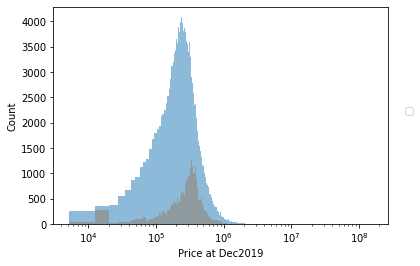

In [81]:
sns.histplot(data=df, x='Price at Dec2019', hue='Description of Property')

plt.xscale('log')
plt.legend(loc=(1.05,0.5))
plt.show()

Next we check the distribution of prices for different counties and types. We can best show that with a boxplot. Alternatives would be a violinplot or a swarmplot. Again we show the price on a log scale.

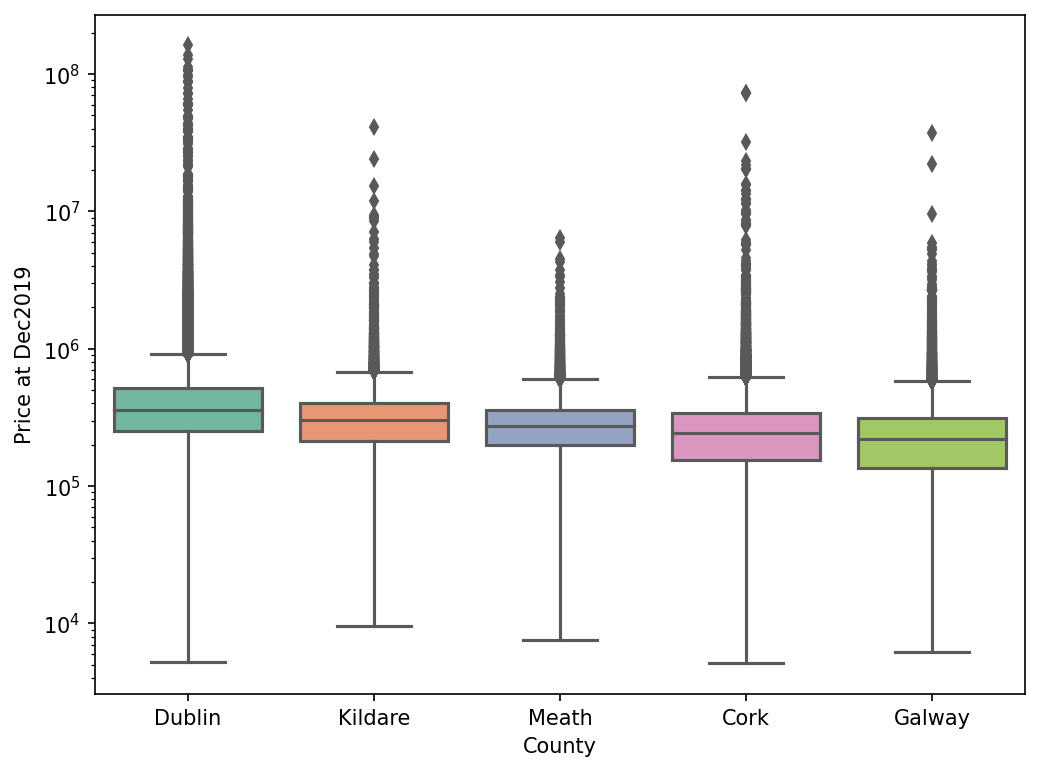

In [100]:
plt.figure(figsize=(8,6), dpi=150)

sns.boxplot(data=df, x='County', y='Price at Dec2019', palette='Set2',
           order=df[['County', 'Price at Dec2019']].groupby(['County']).median().sort_values('Price at Dec2019', ascending=False).index)

plt.yscale('log')
plt.show()

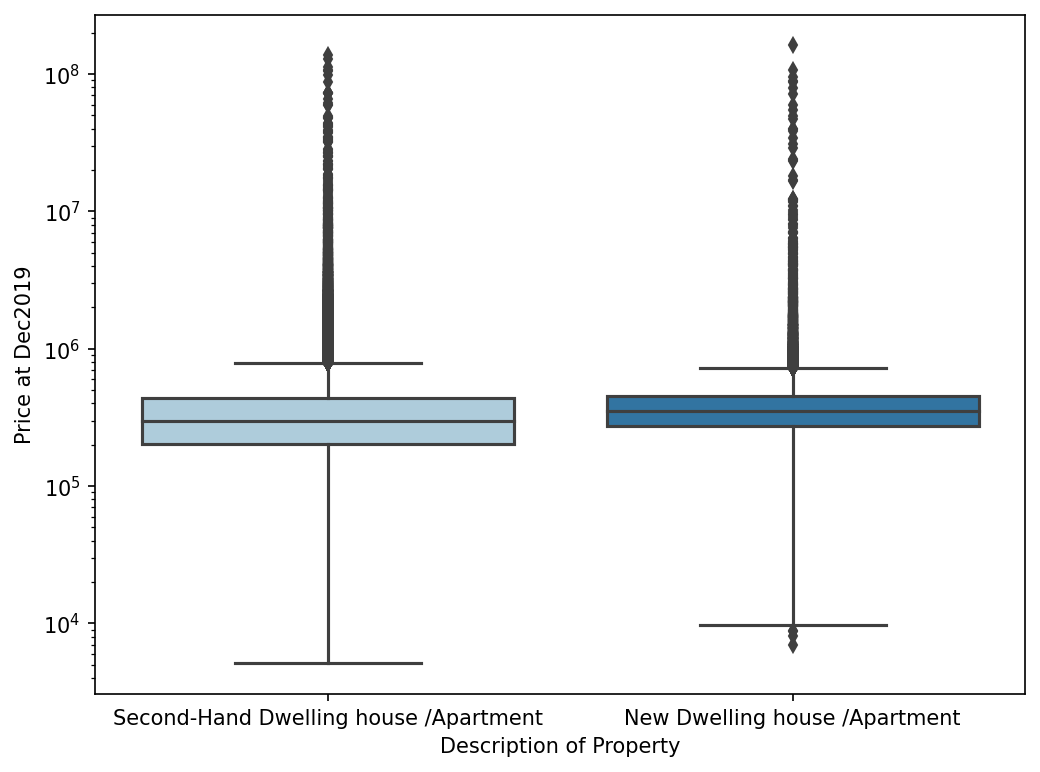

In [83]:
plt.figure(figsize=(8,6), dpi=150)

sns.boxplot(data=df, x='Description of Property', y='Price at Dec2019', palette='Paired')

plt.yscale('log')
plt.show()

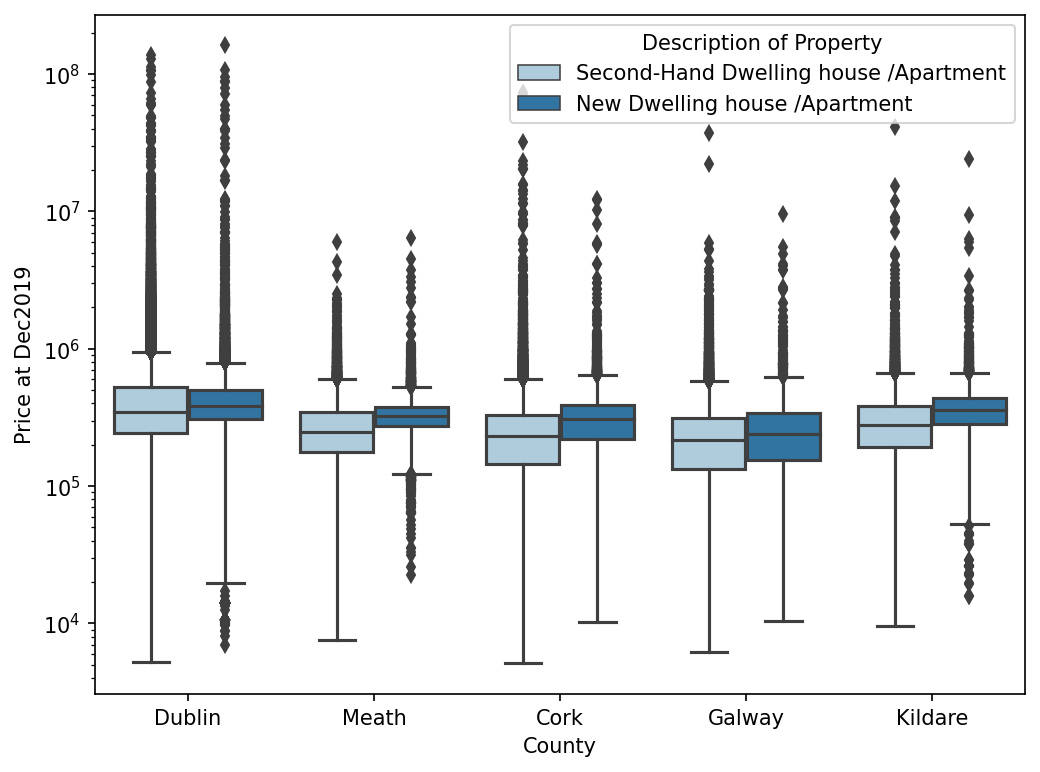

In [84]:
plt.figure(figsize=(8,6), dpi=150)

sns.boxplot(data=df, x='County', y='Price at Dec2019', hue='Description of Property', palette='Paired')

plt.yscale('log')
plt.show()

Now we will track the evolution of important features (prices and RPPP) with time. In order to facilitate the plotting we will create several new dataframes that show the median per month.

In [85]:
# Convert date per day to date per month
df.loc[:, 'Month of Sale (yyyy-mm)'] = df['Date of Sale (yyyy-mm-dd)'].dt.to_period('M')

In [86]:
# monthly data of prices
df_time1 = df.groupby('Month of Sale (yyyy-mm)')[['Price at Dec2019', 'Price with VAT']].median()

In [87]:
df_time1.head()

,Price at Dec2019,Price with VAT
Month of Sale (yyyy-mm),,
2010-01,323503.0,270000.000
2010-02,316462.0,261021.625
2010-03,316405.0,255375.000
2010-04,317096.0,255000.000
2010-05,317174.0,247750.000


In [88]:
# monthly data of prices per county
df_time2 = df.groupby(['County', 'Month of Sale (yyyy-mm)'])[['Price at Dec2019', 
            'Price with VAT']].median()

In [89]:
df_time2.head()

Price at Dec2019  Price with VAT
County Month of Sale (yyyy-mm)                                  
Cork   2010-01                          264194.0      245000.000
       2010-02                          245531.0      225000.000
       2010-03                          263476.0      240000.000
       2010-04                          244089.5      220500.000
       2010-05                          232217.0      205000.295

In [90]:
# monthly data of prices per type of property
df_time3 = df.groupby(['Description of Property', 'Month of Sale (yyyy-mm)'])[['Price at Dec2019', 
            'Price with VAT', 'RPPI']].median()

In [91]:
df_time3.head()

Price at Dec2019  \
Description of Property       Month of Sale (yyyy-mm)                     
New Dwelling house /Apartment 2010-01                          324339.0   
                              2010-02                          308041.0   
                              2010-03                          303523.5   
                              2010-04                          310349.0   
                              2010-05                          293835.0   

                                                       Price with VAT   RPPI  
Description of Property       Month of Sale (yyyy-mm)                         
New Dwelling house /Apartment 2010-01                   270413.182500  115.7  
                              2010-02                   250933.745000  133.7  
                              2010-03                   249999.640000  132.9  
                              2010-04                   257499.487325  131.8  
                              2010-05                   233010.551400  128.8

In [92]:
# monthly data of prices per county and per type of property
df_time4 = df.groupby(['County', 'Description of Property', 'Month of Sale (yyyy-mm)'])[['Price at Dec2019', 
            'Price with VAT']].median()

In [93]:
df_time4.head()

Price at Dec2019  \
County Description of Property       Month of Sale (yyyy-mm)                     
Cork   New Dwelling house /Apartment 2010-01                          308811.5   
                                     2010-02                          307165.0   
                                     2010-03                          312878.0   
                                     2010-04                          291163.5   
                                     2010-05                          279637.0   

                                                              Price with VAT  
County Description of Property       Month of Sale (yyyy-mm)                  
Cork   New Dwelling house /Apartment 2010-01                   286375.544425  
                                     2010-02                   281480.000000  
                                     2010-03                   284999.635000  
                                     2010-04                   263024.996475  
                                     2010-05                   246862.500000

We use df2 to extract the time evolution of the RPPI

In [94]:
df2.loc[:, 'Month (yyyy-mm)'] = df2['Date (yyyy-mm-dd)'].dt.to_period('M')

In [95]:
# Monthly data of RPPI for Dublin and outside Dublin
df_time5 = df2.groupby(['Type of Residential Property', 'Month (yyyy-mm)'])[['VALUE']].mean()

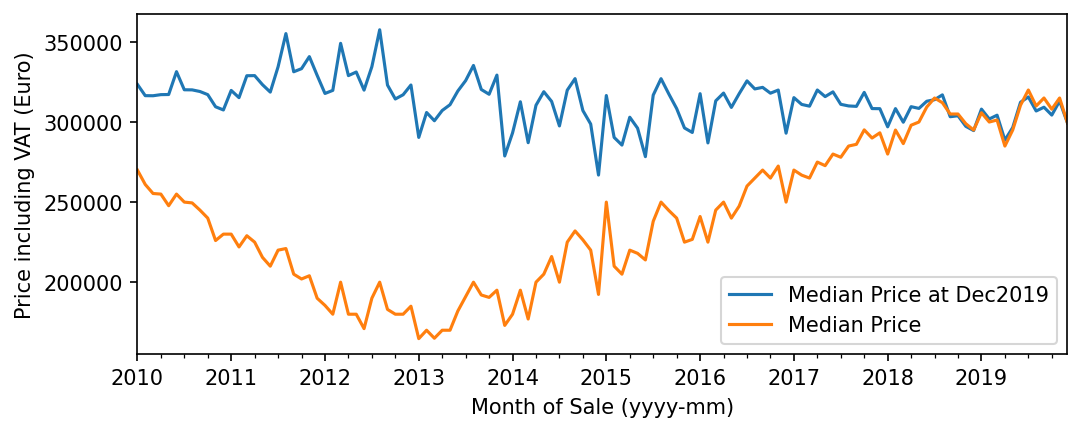

In [96]:
fig, ax = plt.subplots(figsize=(8,3), dpi=150)

df_time1['Price at Dec2019'].plot(ax=ax, label='Median Price at Dec2019')
df_time1['Price with VAT'].plot(ax=ax, label='Median Price')

ax.set_ylabel('Price including VAT (Euro)')

plt.legend()
plt.show()

We see that the median price at Dec2019 (blue curve) is roughly constant - it decreases with time very slowly. On top of this trend there are fluctations (due to noise, randomness) and also a slight seasonality - the price is slightly higher during the summer than during the winter, probably because there is higher demand for apartments and houses during the summer. However, the actual sale price (orange curve) first decreases, then increases and finally levels off. This evolution follows the evolution of the RPPI (next plot). The initial decrease is probably a long-term consequence from the financial crisis of 2008.

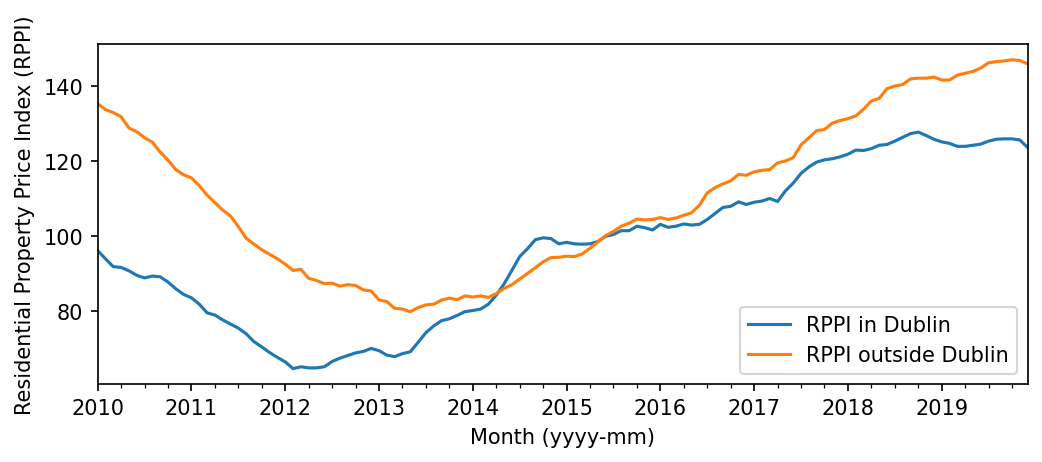

In [97]:
fig, ax = plt.subplots(figsize=(8,3), dpi=150)

df_time5.loc['Dublin - all residential properties', 'VALUE'].plot(ax=ax, label='RPPI in Dublin')
df_time5.loc['National excluding Dublin - all residential properties', 'VALUE'].plot(ax=ax, label='RPPI outside Dublin')

ax.set_ylabel('Residential Property Price Index (RPPI)')

plt.legend()
plt.show()

The RPPI curves in Dublin and outside Dublin have the same shapes. The RPPI outside Dublin is most of the time greater than the RPPI in Dublin.

In [98]:
df['County'].unique()

array(['Dublin', 'Meath', 'Cork', 'Galway', 'Kildare'], dtype=object)

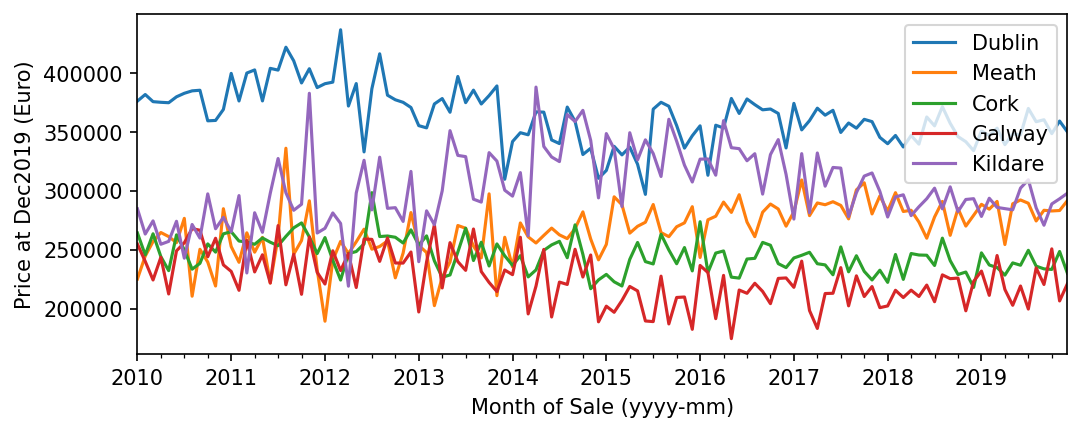

In [101]:
fig, ax = plt.subplots(figsize=(8,3), dpi=150)

df_time2.loc['Dublin', 'Price at Dec2019'].plot(ax=ax, label='Dublin')
df_time2.loc['Meath', 'Price at Dec2019'].plot(ax=ax, label='Meath')
df_time2.loc['Cork', 'Price at Dec2019'].plot(ax=ax, label='Cork')
df_time2.loc['Galway', 'Price at Dec2019'].plot(ax=ax, label='Galway')
df_time2.loc['Kildare', 'Price at Dec2019'].plot(ax=ax, label='Kildare')

ax.set_ylabel('Price at Dec2019 (Euro)')

plt.legend()
plt.show()

The Price at Dec2019 has the same shape for each county - roughly constant with fluctuations and slight seasonality. The different levels of the different curves indicate the different median prices in different counties. Counties with fewer data points have larger fluctuations.

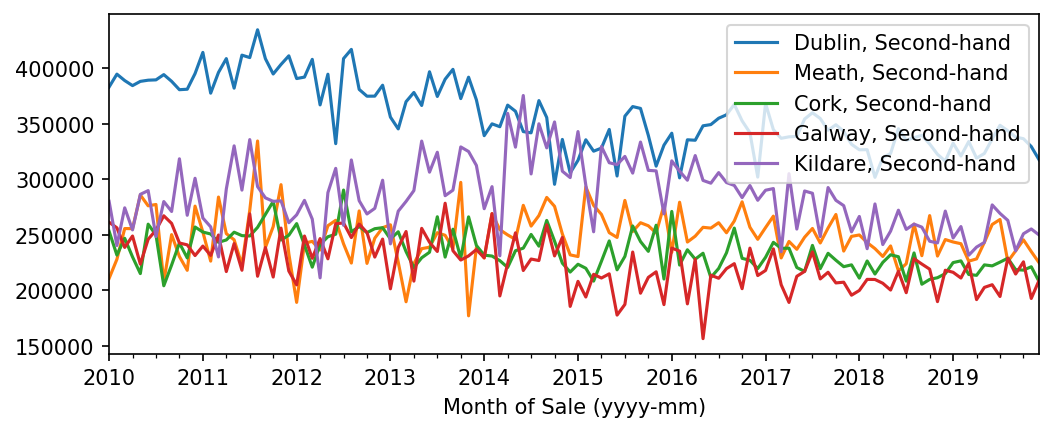

In [102]:
fig, ax = plt.subplots(figsize=(8,3), dpi=150)

df_time4.loc["Dublin"].loc['Second-Hand Dwelling house /Apartment', 'Price at Dec2019'].plot(ax=ax, label='Dublin, Second-hand')
df_time4.loc['Meath'].loc['Second-Hand Dwelling house /Apartment', 'Price at Dec2019'].plot(ax=ax, label='Meath, Second-hand')
df_time4.loc["Cork"].loc['Second-Hand Dwelling house /Apartment', 'Price at Dec2019'].plot(ax=ax, label='Cork, Second-hand')
df_time4.loc["Galway"].loc['Second-Hand Dwelling house /Apartment', 'Price at Dec2019'].plot(ax=ax, label='Galway, Second-hand')
df_time4.loc["Kildare"].loc['Second-Hand Dwelling house /Apartment', 'Price at Dec2019'].plot(ax=ax, label='Kildare, Second-hand')

plt.legend()
plt.show()

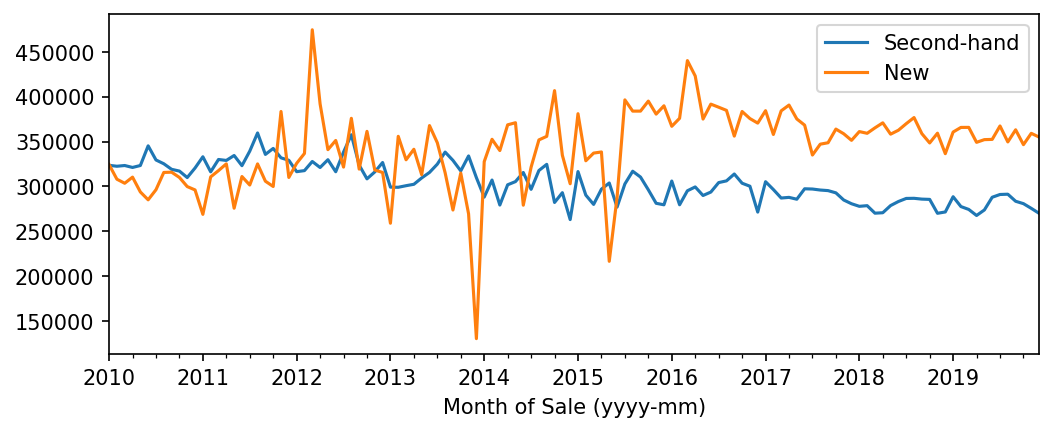

In [103]:
fig, ax = plt.subplots(figsize=(8,3), dpi=150)

df_time3.loc['Second-Hand Dwelling house /Apartment', 'Price at Dec2019'].plot(ax=ax, label='Second-hand')
df_time3.loc['New Dwelling house /Apartment', 'Price at Dec2019'].plot(ax=ax, label='New')

plt.legend()
plt.show()

Again we observe the same behaviour per type of property. Since the number of new properties is much smaller that the number of second-hand properties the 'New' curve has much larger fluctuations, including one very large fluctuation at the end of 2014. As noted previously, the prices of new properties tend to be higher than the prices of second-hand properties and this is especially clear after the middle of 2015.

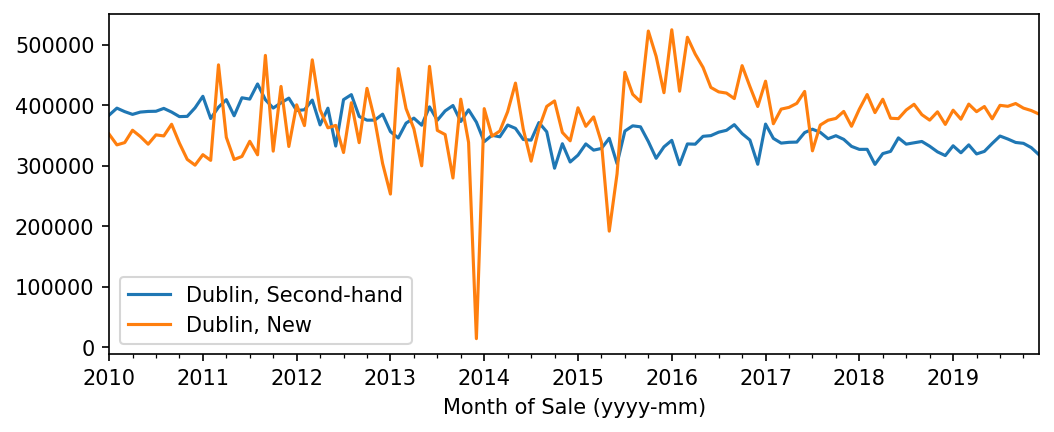

In [104]:
fig, ax = plt.subplots(figsize=(8,3), dpi=150)

df_time4.loc["Dublin"].loc['Second-Hand Dwelling house /Apartment', 'Price at Dec2019'].plot(ax=ax, label='Dublin, Second-hand')
df_time4.loc['Dublin'].loc['New Dwelling house /Apartment', 'Price at Dec2019'].plot(ax=ax, label='Dublin, New')

plt.legend()
plt.show()

##### Outlier Detection

We would like to detect the following 2 types of outliers:

* **Residential sales which may have been sold for abnormally low values** i.e. those which may have been sold for less than what they are worth.


* **Residential sales which may have been sold for abnormally high values** i.e. those sales which may have been entered in error, such as apartment blocks.


#### Standard outlier detection

A standard outlier detection approach is to find the first and third quartiles $Q1$ and $Q3$, the interquartile range $IQR = Q3 - Q1$, to define lower and upper bounds $Q1 - 1.5 IQR$ and $Q3 + 1.5 IQR$, and to classify as an outlier any point that lies outside those bounds. This procedure is shown below and also in the box plots above. However, this procedure does not work here and we wouldn't recommend it to the client. The reason is that the distribution of prices (overall and for any county or/and type) is very asymmetric - it has a very long tail on the right. As a result, about $7$% of the data points are classified as outliers and they all lie in the upper region (high prices)! We need a more robust procedure which takes into account the skewness of the distribution, and also takes into account that typical prices vary with county and type, so a given price might be normal in Dublin but be an outlier somewhere else.

In [105]:
df_quant = df.quantile(q=[0.001, 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 0.999])

In [106]:
df_quant

,Price (Euro),Price with VAT,RPPI,Price at Dec2019
0.001,8000.000,9.080000e+03,64.6,11889.25
0.010,30000.000,3.000000e+04,65.1,39830.40
0.050,69670.925,7.000000e+04,69.4,94027.25
0.250,162500.000,1.650000e+05,94.2,211902.00
0.500,248000.000,2.523130e+05,107.9,310151.00
0.750,352423.000,3.650839e+05,125.1,441796.00
0.950,704845.000,7.250000e+05,143.4,879398.25
0.990,1435000.000,1.450000e+06,146.8,1761135.45
0.999,5499669.545,5.586750e+06,147.0,6755775.94


In [107]:
q1 = df_quant.loc[0.25, 'Price at Dec2019']

In [108]:
q3 = df_quant.loc[0.75, 'Price at Dec2019']

In [109]:
q1, q3

(211902.0, 441796.0)

In [110]:
iqr = q3 - q1

In [111]:
iqr

229894.0

In [112]:
lower_bound = q1 - 1.5*iqr

In [113]:
upper_bound = q3 + 1.5*iqr

In [114]:
lower_bound, upper_bound

(-132939.0, 786637.0)

In [115]:
df_out = df[df['Price at Dec2019'] > upper_bound]

In [116]:
len(df_out)/len(df)

0.06658243193634586

In [117]:
len(df_out), len(df)

(15598, 234266)

#### Outlier detection using the Z-score of the Log of the Dec2019 price

The actual procedure that we implement is based on the Z-score. We first log transform the price, then find the mean $\mu$ and the standard deviation $\sigma$ of the resultant distribution, and finally subtract the mean and rescale by the standard deviation:
\begin{equation}
Z = \frac{Log(Price) - \mu}{\sigma}
\end{equation}
We define as outliers those data points that have a Z-score larger than $3$ or smaller than $-3$. We compute the Z-score for each of the $10$ different distributions arising from conditioning on the county and type of the property, because we want to take into account the variation of price with county and type. As before, we work with the transformed price so that it is comparable to December 2019, because we don't want to consider any potential outliers coming from an economic peak or fall.

We choose this approach first because it is simple and easy to interpret. Therefore, it would be very easy to explain it to the client and to understand why it works. Second, it does not rely on any prior choice of the number of outliers. For many unsupervised outlier detection algorithms, this number has to be specified (the so called contamination parameter). I have actually tried such algorithms, for example LOF, Isolation Forest and Clustering (the results can be seen in the Appendix), but they don't seem to produce results as good as the simple Z-score method. Third, taking the logarithm transforms the heavily skewed data into something which is almost symmetric and therefore allows to look for both high and low abnormal prices. Fourth, it is very easy to accomodate new data and to recompute the Z-score based on it. Lastly, after we conditionalise on county and type, we are left with only a single feature that determines outliers, namely the price, and therefore we have a $1D$ problem and so using a high-dimensional approach is both unnecessary and computationally expensive.

In [118]:
# Compute the log of the price; create a new column
df.loc[:, 'Log of Price'] = df.apply(lambda x: np.log(x['Price at Dec2019']), axis=1)

In [119]:
df.head()

,Address,County,Price (Euro),Not Full Market Price,VAT Exclusive,Description of Property,Date of Sale (yyyy-mm-dd),Price with VAT,RPPI,Price at Dec2019,Month of Sale (yyyy-mm),Log of Price
0,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-01,343000.0,96.1,441153.0,2010-01,12.997147
2,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,438500.0,96.1,563981.0,2010-01,13.242776
3,"1 The Haven, Mornington",Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,400000.0,135.3,431338.0,2010-01,12.974647
5,"12 Sallymount Avenue, Ranelagh",Dublin,425000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,425000.0,96.1,546618.0,2010-01,13.211505
8,"15 Carriglawn, Waterpark, Carrigaline",Cork,180000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,180000.0,135.3,194102.0,2010-01,12.176139


In [120]:
# Create a convenient dataframe to extract the mean and std for each region of the feature space
df_log = df.groupby(['County', 'Description of Property'])['Log of Price'].agg(['mean', 'std'])

In [121]:
df_log

mean       std
County  Description of Property                                   
Cork    New Dwelling house /Apartment          12.568432  0.536966
        Second-Hand Dwelling house /Apartment  12.271365  0.704348
Dublin  New Dwelling house /Apartment          12.859217  0.635596
        Second-Hand Dwelling house /Apartment  12.800068  0.674209
Galway  New Dwelling house /Apartment          12.305474  0.699104
        Second-Hand Dwelling house /Apartment  12.197456  0.722031
Kildare New Dwelling house /Apartment          12.729915  0.477765
        Second-Hand Dwelling house /Apartment  12.490349  0.599452
Meath   New Dwelling house /Apartment          12.665605  0.379998
        Second-Hand Dwelling house /Apartment  12.388169  0.605566

In [122]:
# Example of how to extract the mean log-price for second-hand properties in Cork
df_log.loc['Cork'].loc['Second-Hand Dwelling house /Apartment', 'mean']

12.27136463099137

In [123]:
def find_z_score(county, prop_type, log_price):
    """Takes the county, the property type and the log of the price and finds the Z-score"""
    return (log_price - df_log.loc[county].loc[prop_type, 'mean'])/df_log.loc[county].loc[prop_type, 'std']

In [124]:
# Compute the Z-score for each entry and create a new column (takes a few minutes to run)
df.loc[:, 'Z-score'] = df.apply(lambda x: find_z_score(x['County'], x['Description of Property'], x['Log of Price']), axis=1)

In [125]:
df.head()

,Address,County,Price (Euro),Not Full Market Price,VAT Exclusive,Description of Property,Date of Sale (yyyy-mm-dd),Price with VAT,RPPI,Price at Dec2019,Month of Sale (yyyy-mm),Log of Price,Z-score
0,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-01,343000.0,96.1,441153.0,2010-01,12.997147,0.292312
2,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,438500.0,96.1,563981.0,2010-01,13.242776,0.656633
3,"1 The Haven, Mornington",Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,400000.0,135.3,431338.0,2010-01,12.974647,0.968481
5,"12 Sallymount Avenue, Ranelagh",Dublin,425000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,425000.0,96.1,546618.0,2010-01,13.211505,0.610252
8,"15 Carriglawn, Waterpark, Carrigaline",Cork,180000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,180000.0,135.3,194102.0,2010-01,12.176139,-0.135197


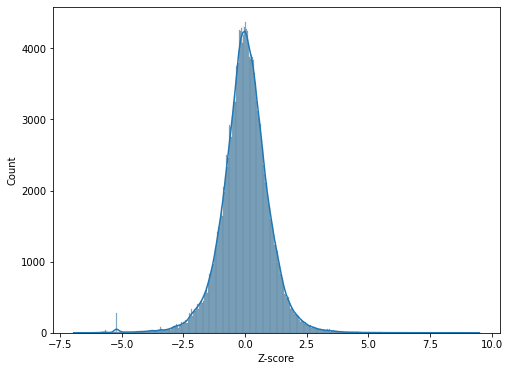

In [126]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=df, x='Z-score', kde=True, ax=ax)


plt.show()

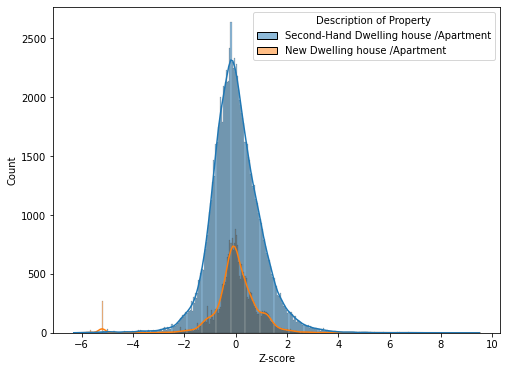

In [127]:
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(data=df[df['County']=='Dublin'], x='Z-score', kde=True, ax=ax, hue='Description of Property')

plt.show()

We set the critical Z-value for outlier detection at $3$. This a bit arbitrary but works well here. One way to justify it is by noting that the distributions above have the same shape as a normal distribution, and in many fields of science where the standard error of the mean follows a normal distribution, it is accepted that a measurement has to lie at least $3$ standard deviations away from the mean in order to claim a discovery.

In [128]:
Z_cr = 3

In [129]:
outliers = df[(df['Z-score']>Z_cr)|(df['Z-score']<-Z_cr)]

In [130]:
len(outliers), len(df)

(3017, 234266)

In [131]:
len(outliers)/len(df)

0.01287852270495932

Approximately $1$% of the data points are classified as outliers. This makes more sense than the $7$% that we discovered with the IQR method.

In [132]:
low_outliers = outliers[outliers['Z-score']<0].sort_values('Price at Dec2019', ascending=True)

In [133]:
high_outliers = outliers[outliers['Z-score']>0].sort_values('Price at Dec2019', ascending=False)

In [134]:
len(low_outliers), len(high_outliers)

(1856, 1161)

In [135]:
low_outliers

,Address,County,Price (Euro),Not Full Market Price,VAT Exclusive,Description of Property,Date of Sale (yyyy-mm-dd),Price with VAT,RPPI,Price at Dec2019,Month of Sale (yyyy-mm),Log of Price,Z-score
358672,"COULAGHARD, EYERIES, BEARA",Cork,5030.53,No,No,Second-Hand Dwelling house /Apartment,2019-03-11,5030.5300,142.9,5136.0,2019-03,8.544030,-5.291893
307476,"52 MOUNTPLEASANT AVE, RANELAGH, DUBLIN 6",Dublin,5250.00,No,No,Second-Hand Dwelling house /Apartment,2018-04-26,5250.0000,123.3,5263.0,2018-04,8.568456,-6.276411
361059,"3 EMOR ST, CIRCULAR RD SOUTH, DUBLIN 8",Dublin,5400.00,No,No,Second-Hand Dwelling house /Apartment,2019-03-28,5400.0000,123.9,5387.0,2019-03,8.591744,-6.241871
4016,"13 GERALD GRIFFIN STREET, CORK",Cork,5250.00,No,No,Second-Hand Dwelling house /Apartment,2010-03-30,5250.0000,132.9,5764.0,2010-03,8.659387,-5.128115
369544,"3 ARBOUR HILL, STONEYBATTER, DUBLIN 7",Dublin,5900.00,No,No,Second-Hand Dwelling house /Apartment,2019-05-24,5900.0000,124.2,5871.0,2019-05,8.677780,-6.114260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17213,"19 The Meadows, Kildalkey, Meath",Meath,68100.00,No,Yes,New Dwelling house /Apartment,2010-11-01,77293.5000,117.7,95812.0,2010-11,11.470143,-3.145966
130437,"14 Dun Na Si, Rathcore Golf and Country Club, ...",Meath,55000.00,No,Yes,New Dwelling house /Apartment,2014-11-27,62425.0000,94.2,96686.0,2014-11,11.479224,-3.122069
283988,"Apartment 11, Wellington Hall, Iffernock",Meath,88106.00,No,No,New Dwelling house /Apartment,2017-11-20,88106.0000,130.1,98806.0,2017-11,11.500914,-3.064991
3553,"32 Block 1, Castlemartin Close, Bettystown",Meath,80000.00,No,Yes,New Dwelling house /Apartment,2010-03-22,90800.0000,132.9,99682.0,2010-03,11.509740,-3.041762


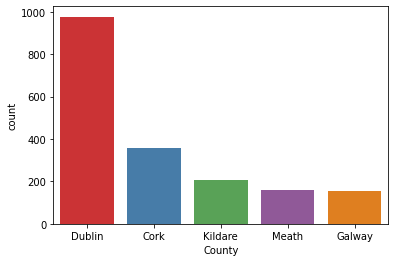

In [136]:
sns.countplot(data=low_outliers, x='County', order=low_outliers['County'].value_counts().index, palette='Set1');

/Users/mgx82z/Desktop/Accenture task/Dock_assessment/assessment_202006v1/venv/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


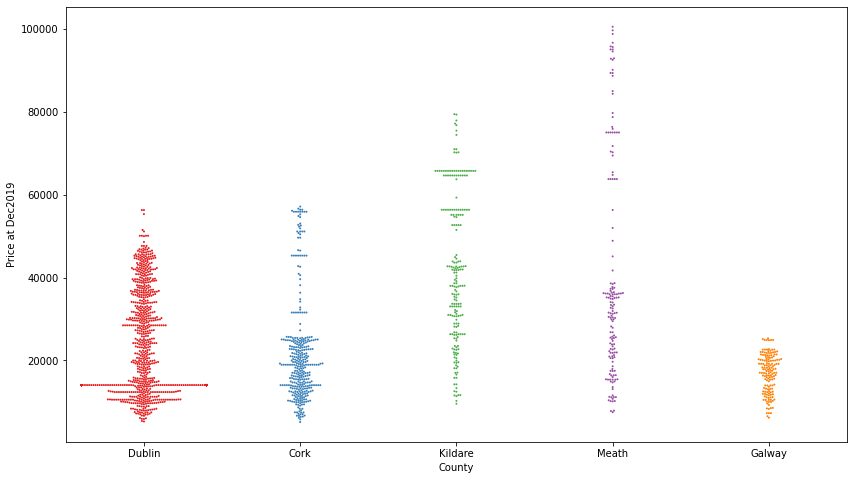

In [142]:
plt.figure(figsize=(14,8))
sns.swarmplot(data=low_outliers, x='County', y='Price at Dec2019', size=2,
             order=low_outliers['County'].value_counts().index, palette='Set1');

In [138]:
high_outliers

,Address,County,Price (Euro),Not Full Market Price,VAT Exclusive,Description of Property,Date of Sale (yyyy-mm-dd),Price with VAT,RPPI,Price at Dec2019,Month of Sale (yyyy-mm),Log of Price,Z-score
408549,"Blocks A and C, The Point Campus",Dublin,1.422566e+08,No,Yes,New Dwelling house /Apartment,2019-12-23,1.614612e+08,123.6,161461214.0,2019-12,18.899776,9.503774
316177,"COMMERCIAL PROPERTY AND, 423 RESI UNITS AT CLA...",Dublin,1.391650e+08,Yes,No,Second-Hand Dwelling house /Apartment,2018-06-22,1.391650e+08,124.4,138270048.0,2018-06,18.744719,8.817226
378709,"266 Apts & 18 Commercial Units, Heuston South ...",Dublin,1.295000e+08,No,No,Second-Hand Dwelling house /Apartment,2019-07-19,1.295000e+08,125.3,127743017.0,2019-07,18.665531,8.699773
114323,"Block F K and L Central Park, Leopardstown",Dublin,8.636500e+07,No,No,Second-Hand Dwelling house /Apartment,2014-07-24,8.636500e+07,94.5,112959937.0,2014-07,18.542544,8.517355
369867,"Apartments 1-164 Fairwary Court, &amp; 1-50 Fa...",Dublin,9.524229e+07,No,Yes,New Dwelling house /Apartment,2019-05-27,1.081000e+08,124.2,107577778.0,2019-05,18.493725,8.864924
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324736,"18 Holsteiner Park, Williamstown Stud, Clonee",Meath,8.810573e+05,No,Yes,New Dwelling house /Apartment,2018-08-16,1.000000e+06,140.4,1039174.0,2018-08,13.853937,3.127200
87760,"Apartments Block 8, The Court Dunboyne Castl...",Meath,5.180620e+05,No,Yes,New Dwelling house /Apartment,2013-11-08,5.880004e+05,83.0,1033605.0,2013-11,13.848563,3.113059
93360,"Strand Cottage, Coast Road, Laytown",Meath,5.100000e+05,No,Yes,New Dwelling house /Apartment,2013-12-19,5.788500e+05,84.0,1005407.0,2013-12,13.820903,3.040269
87761,"Apartments Block 9, The Court Dunboyne Castl...",Meath,5.022020e+05,No,Yes,New Dwelling house /Apartment,2013-11-08,5.699993e+05,83.0,1001963.0,2013-11,13.817472,3.031239


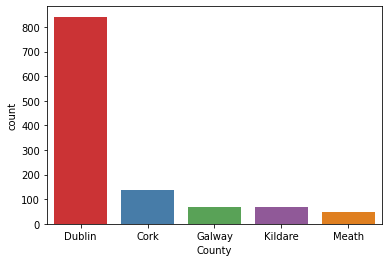

In [141]:
sns.countplot(data=high_outliers, x='County', order=high_outliers['County'].value_counts().index, palette='Set1');

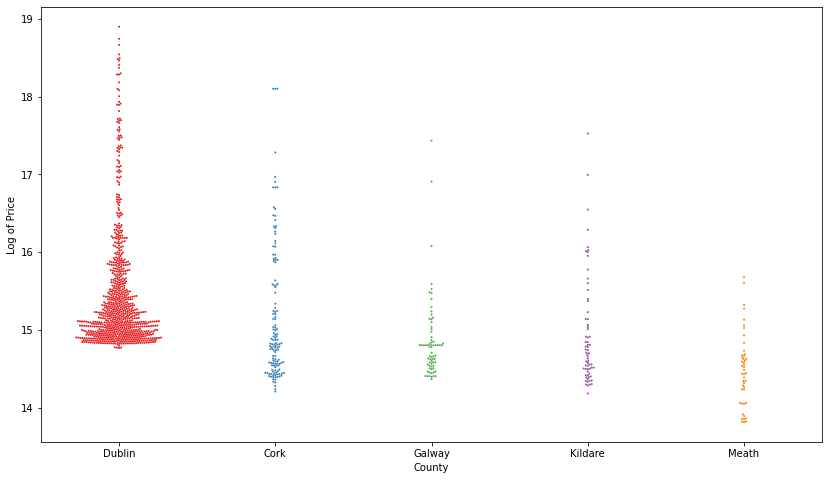

In [140]:
plt.figure(figsize=(14,8))
sns.swarmplot(data=high_outliers, x='County', y='Log of Price', size=2,
             order=high_outliers['County'].value_counts().index, palette='Set1');

The highest price occuring in the low outliers is ~$100,000$ Euro. It makes sense to flag any price below that as suspicious (especially if the property is located in Dublin) and check it, as it may be the case that the buyer has avoided to pay some taxes. 

The lowest price occuring in the high outliers is ~$1,000,000$ Euro. It makes sense that any sale at a price greater than that might actually contain more than one residences.

For comparison, the first quartile occurs at ~$200,000$ Euro, the median at ~$300,000$ Euro and the third quartile at ~$450,000$ Euro. The above quoted values for the outliers are clearly quite extreme.

##### Forecasting Stamp Duty

Finally, we would like to forecast the monthly stamp duty which is related to the sale price by

$$
\text{Stamp Duty Due} = \text{Stamp Duty Rate} \times (\text{Sale Price}-(\text{Sale Price} \times \text{VAT}))
$$

where, **Stamp Duty Rate** is assumed to be 1% for all sales and **VAT** is 13.5%.


The stamp duty is a linear function of the sale price without VAT. In order to calculate it for any given sale, we would have to first find the VAT exclusive price, and then use the above formula. Therefore, if we want to forecast the typical monthly stamp duty, we first have to forecast the typical (measured by the median) montly sale price. Since we have monthly data for $10$ years, it would be realistic to make a monthly forecast for the next $2$ years.

The actual sale price is determined by two variables - the RPPI and the bare price (comparable to December, 2019). These two variables are independent and we already know how they evolve with time. If we predict each of these two variables, we can combine them to predict the actual sale price. 

In order to make more accurate predictions we have to conditionalise on the county and the type of the property. Below we work with data for Dublin and for second-hand property, but the same method can be applied to any other combination.

In order to judge to what extent a forecast is suitable given the information that we have available, we will attempt to predict the bare price and the RPPI for a period of 2 years by using an ARIMA model. We choose an ARIMA model because ARIMA models are generally quite efficient and because we don't have any exegenous variables to worry about (except for county and type which we have already conditionalised on).

In [143]:
def find_stamp_duty(price):
    """Formula to calculate stamp duty from price."""
    return np.round_(0.01 * price * 0.865)

In [144]:
df.head()

,Address,County,Price (Euro),Not Full Market Price,VAT Exclusive,Description of Property,Date of Sale (yyyy-mm-dd),Price with VAT,RPPI,Price at Dec2019,Month of Sale (yyyy-mm),Log of Price,Z-score
0,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-01,343000.0,96.1,441153.0,2010-01,12.997147,0.292312
2,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,438500.0,96.1,563981.0,2010-01,13.242776,0.656633
3,"1 The Haven, Mornington",Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,400000.0,135.3,431338.0,2010-01,12.974647,0.968481
5,"12 Sallymount Avenue, Ranelagh",Dublin,425000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,425000.0,96.1,546618.0,2010-01,13.211505,0.610252
8,"15 Carriglawn, Waterpark, Carrigaline",Cork,180000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,180000.0,135.3,194102.0,2010-01,12.176139,-0.135197


In [145]:
def remove_vat(price, vat_exclusive):
    if vat_exclusive == 'Yes':
        return price
    elif vat_exclusive == 'No':
        return np.round_(price / 1.135)

In [146]:
df.loc[:, 'Price without VAT'] = df.apply(lambda x: remove_vat(x['Price (Euro)'], x['VAT Exclusive']), axis=1)

In [147]:
df.head()

,Address,County,Price (Euro),Not Full Market Price,VAT Exclusive,Description of Property,Date of Sale (yyyy-mm-dd),Price with VAT,RPPI,Price at Dec2019,Month of Sale (yyyy-mm),Log of Price,Z-score,Price without VAT
0,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-01,343000.0,96.1,441153.0,2010-01,12.997147,0.292312,302203.0
2,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,438500.0,96.1,563981.0,2010-01,13.242776,0.656633,386344.0
3,"1 The Haven, Mornington",Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,400000.0,135.3,431338.0,2010-01,12.974647,0.968481,352423.0
5,"12 Sallymount Avenue, Ranelagh",Dublin,425000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,425000.0,96.1,546618.0,2010-01,13.211505,0.610252,374449.0
8,"15 Carriglawn, Waterpark, Carrigaline",Cork,180000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,180000.0,135.3,194102.0,2010-01,12.176139,-0.135197,158590.0


In [148]:
df.loc[:, 'Stamp duty'] = df.apply(lambda x: find_stamp_duty(x['Price without VAT']), axis=1)

In [149]:
df.head()

,Address,County,Price (Euro),Not Full Market Price,VAT Exclusive,Description of Property,Date of Sale (yyyy-mm-dd),Price with VAT,RPPI,Price at Dec2019,Month of Sale (yyyy-mm),Log of Price,Z-score,Price without VAT,Stamp duty
0,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-01,343000.0,96.1,441153.0,2010-01,12.997147,0.292312,302203.0,2614.0
2,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,438500.0,96.1,563981.0,2010-01,13.242776,0.656633,386344.0,3342.0
3,"1 The Haven, Mornington",Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,400000.0,135.3,431338.0,2010-01,12.974647,0.968481,352423.0,3048.0
5,"12 Sallymount Avenue, Ranelagh",Dublin,425000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,425000.0,96.1,546618.0,2010-01,13.211505,0.610252,374449.0,3239.0
8,"15 Carriglawn, Waterpark, Carrigaline",Cork,180000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,180000.0,135.3,194102.0,2010-01,12.176139,-0.135197,158590.0,1372.0


In [150]:
df_stamp = df.groupby(['County', 'Description of Property', 'Month of Sale (yyyy-mm)'])[['Stamp duty']].median()

In [151]:
df_stamp.head()

Stamp duty
County Description of Property       Month of Sale (yyyy-mm)            
Cork   New Dwelling house /Apartment 2010-01                      2182.5
                                     2010-02                      2145.0
                                     2010-03                      2172.0
                                     2010-04                      2005.0
                                     2010-05                      1881.5

In [152]:
df_stamp_Dub = pd.DataFrame(df_stamp.loc["Dublin"].loc['Second-Hand Dwelling house /Apartment', 'Stamp duty'])

In [153]:
df_stamp_Dub.head()

,Stamp duty
Month of Sale (yyyy-mm),
2010-01,2271.0
2010-02,2286.0
2010-03,2203.0
2010-04,2172.0
2010-05,2172.0


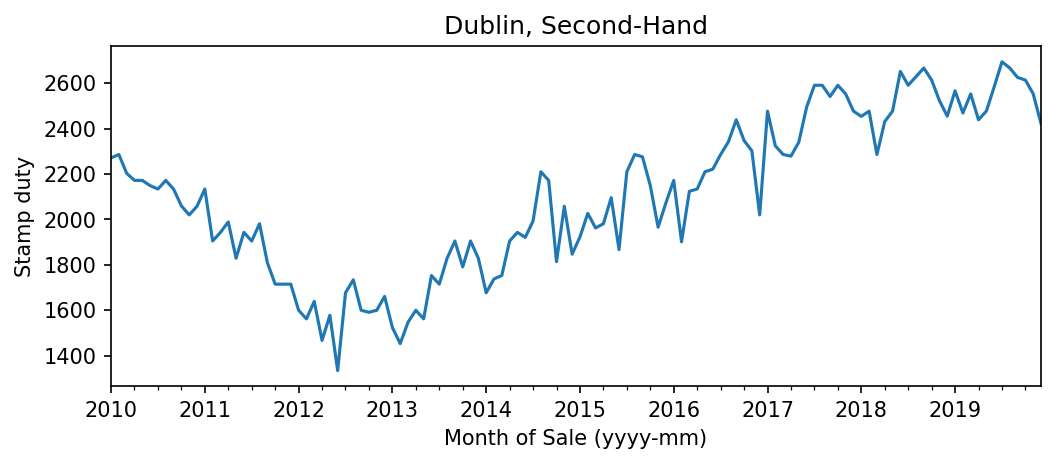

In [154]:
fig, ax = plt.subplots(figsize=(8,3), dpi=150)

df_stamp_Dub['Stamp duty'].plot(ax=ax)

ax.set_ylabel('Stamp duty')
ax.set_title('Dublin, Second-Hand')

plt.show()

#### Predicting the bare sales with ARIMA

An ARIMA(p, d, q) model is a combination of 3 different models: an Autoregressive (AR) model with parameter p, a Moving Average (MA) model with parameter q, and an Integrated model incorporating differencing of the time series to make it stationary.

We first create a new data frame df_Dub which contains the pure monthly time series of prices for second-hand properties in Dublin.

In [155]:
df_Dub = pd.DataFrame(df_time4.loc["Dublin"].loc['Second-Hand Dwelling house /Apartment', 'Price at Dec2019'])

In [156]:
df_Dub.head()

,Price at Dec2019
Month of Sale (yyyy-mm),
2010-01,383276.0
2010-02,394888.0
2010-03,389111.0
2010-04,384563.0
2010-05,388379.0


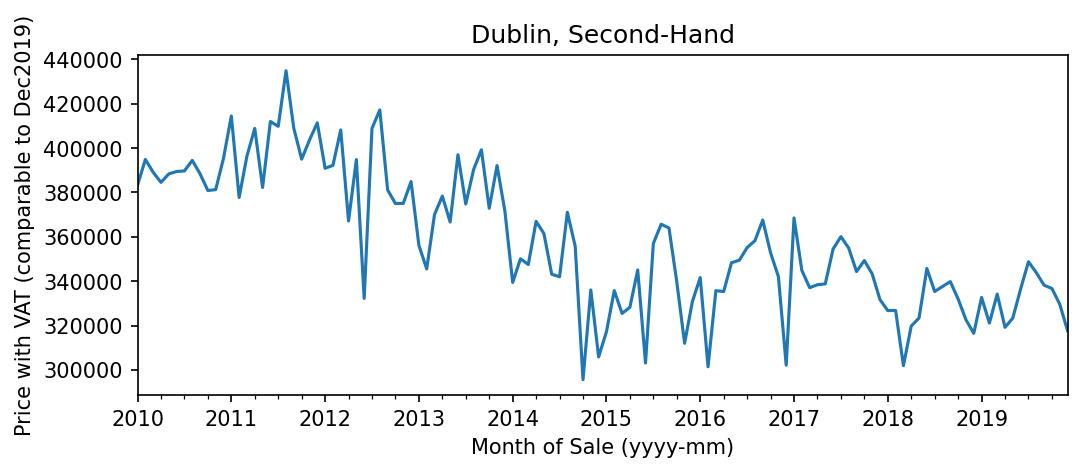

In [157]:
fig, ax = plt.subplots(figsize=(8,3), dpi=150)

df_Dub['Price at Dec2019'].plot(ax=ax)

ax.set_ylabel('Price with VAT (comparable to Dec2019)')
ax.set_title('Dublin, Second-Hand')

plt.show()

We perform a seasonal decomposition to see better the trend, the seasonality and the noise.

In [158]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [159]:
df_Dub.index = df_Dub.index.to_timestamp()

In [160]:
decomp_Dub = seasonal_decompose(df_Dub['Price at Dec2019'], model='additive')

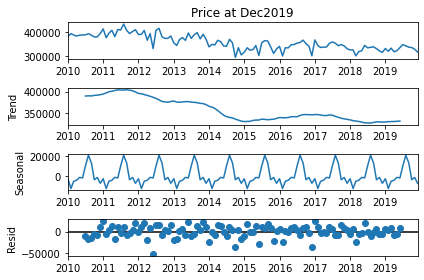

In [161]:
decomp_Dub.plot();

In order to choose the optimal parameters for the ARIMA model we use the auto_arima function from the pmdarima library: https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html?highlight=auto_arima.
An alternative way to estimate the optimal $p$ and $q$ parameters is by looking at the Autocorrelation function (ACF) and Partial autocorrelation function (PACF) plots. An alternative way to estimate the optimal $d$ parameter is by repeatedly differencing the time series, and at each step performing a Dickey-Fuller Test for stationarity, then picking the first level for which the time series is stationary. 

In [162]:
from pmdarima import auto_arima

In [163]:
from statsmodels.tsa.arima_model import ARMA, ARMAResults, ARIMA, ARIMAResults

In [164]:
auto_arima(df_Dub['Price at Dec2019'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1356.772
Date:                Wed, 18 Aug 2021   AIC                           2715.545
Time:                        14:40:37   BIC                           2718.324
Sample:                             0   HQIC                          2716.673
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.646e+08   4.42e+07     10.518      0.000    3.78e+08    5.51e+08
===================================================================================
Ljung-Box (L1) (Q):                  23.40   Jarque-Bera (JB):                14.71
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.19
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We will run an ARIMA(0,1,0) model i.e. simply a 1st order differencing model. This is because the evolution of the bare price is really quite simple as noted before.

We first split the data in a training set (8 years) and test set (2 years), train the model on the training set and evaluate on the test set. Then we fit the model for the whole period and forecast for the next 2 years.

In [165]:
train_Dub = df_Dub.loc[:'2017-12-01']
test_Dub = df_Dub.loc['2018-01-01':]

In [166]:
# Just to ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [167]:
model_Dub = ARIMA(train_Dub['Price at Dec2019'], order=(0, 1, 0))
results_Dub = model_Dub.fit()
results_Dub.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.Price at Dec2019   No. Observations:                   95
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1091.039
Method:                           css   S.D. of innovations          23521.886
Date:                Wed, 18 Aug 2021   AIC                           2186.079
Time:                        14:42:55   BIC                           2191.187
Sample:                    02-01-2010   HQIC                          2188.143
                         - 12-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -542.8105   2413.295     -0.225      0.822   -5272.781    4187.160
==============================================================================
"""

In [168]:
start_Dub=len(train_Dub)
end_Dub=len(train_Dub)+len(test_Dub)-1
predictions_Dub = results_Dub.predict(start=start_Dub, end=end_Dub, 
                                        dynamic=False, typ='levels').rename('ARIMA(0,1,0) Predictions for the bare price')

In [169]:
for i in range(len(predictions_Dub)):
    print(f"predicted={predictions_Dub[i]:<11.10}, expected={test_Dub['Price at Dec2019'][i]}")

predicted=331166.1895, expected=326759.0
predicted=330623.3789, expected=326851.0
predicted=330080.5684, expected=301954.0
predicted=329537.7579, expected=319776.0
predicted=328994.9474, expected=323430.0
predicted=328452.1368, expected=345762.0
predicted=327909.3263, expected=335387.0
predicted=327366.5158, expected=337625.0
predicted=326823.7053, expected=339827.0
predicted=326280.8947, expected=331987.0
predicted=325738.0842, expected=322647.0
predicted=325195.2737, expected=316519.0
predicted=324652.4632, expected=332712.0
predicted=324109.6526, expected=321142.0
predicted=323566.8421, expected=334189.0
predicted=323024.0316, expected=319225.0
predicted=322481.2211, expected=323430.0
predicted=321938.4105, expected=336549.5
predicted=321395.6   , expected=348802.5
predicted=320852.7895, expected=343879.0
predicted=320309.9789, expected=338206.5
predicted=319767.1684, expected=336734.0
predicted=319224.3579, expected=329666.0
predicted=318681.5474, expected=317750.0


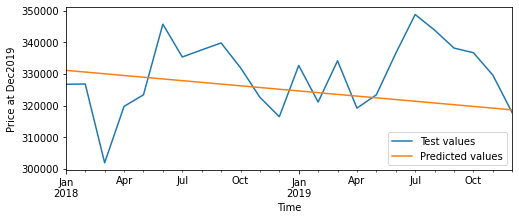

In [170]:
ax = test_Dub['Price at Dec2019'].plot(legend=True, figsize=(8,3), label='Test values')
predictions_Dub.plot(legend=True, label='Predicted values')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel='Time', ylabel='Price at Dec2019');

Of course, the model does not capture the noise, only the trend which is linear.

In order to evaluate the model we use the mean squared error, the root mean squared error and the mean absolute error.

In [171]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [172]:
MSE_Dub = mean_squared_error(test_Dub['Price at Dec2019'], predictions_Dub)
MSE_Dub

171378708.89334056

In [173]:
RMSE_Dub = np.sqrt(MSE_Dub)
RMSE_Dub

13091.169118659363

In [174]:
MAE_Dub = mean_absolute_error(test_Dub['Price at Dec2019'], predictions_Dub)

In [175]:
MAE_Dub

10618.063377192855

In order to estimate how large these errors are, we compare to the mean of the test data.

In [176]:
test_Dub['Price at Dec2019'].mean()

329617.0625

In [177]:
RMSE_Dub/test_Dub['Price at Dec2019'].mean()

0.039716296903347846

In [178]:
MAE_Dub/test_Dub['Price at Dec2019'].mean()

0.03221333051347381

The performance seems to be good. Now we fit with the whole data and forecast.

In [179]:
model_Dub = ARIMA(df_Dub['Price at Dec2019'], order=(0, 1, 0))
results_Dub = model_Dub.fit()
fcast_Dub = results_Dub.predict(len(df_Dub), len(df_Dub)+23, typ='levels').rename('ARIMA(0, 1, 0) Forecast')

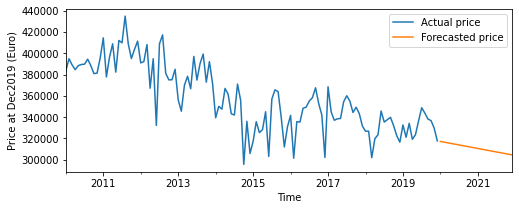

In [180]:
ax = df_Dub['Price at Dec2019'].plot(legend=True, figsize=(8,3), label='Actual price')
fcast_Dub.plot(legend=True, label='Forecasted price')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel='Time', ylabel='Price at Dec2019 (Euro)');

#### Predicting the RPPI with ARIMA

We create a dataframe df_rppi which contains the pure time series for the RPPI in Dublin.

In [181]:
df_rppi = pd.DataFrame(df_time5.loc['Dublin - all residential properties', 'VALUE'])

In [182]:
df_rppi.head()

,VALUE
Month (yyyy-mm),
2010-01,96.1
2010-02,93.9
2010-03,91.8
2010-04,91.6
2010-05,90.7


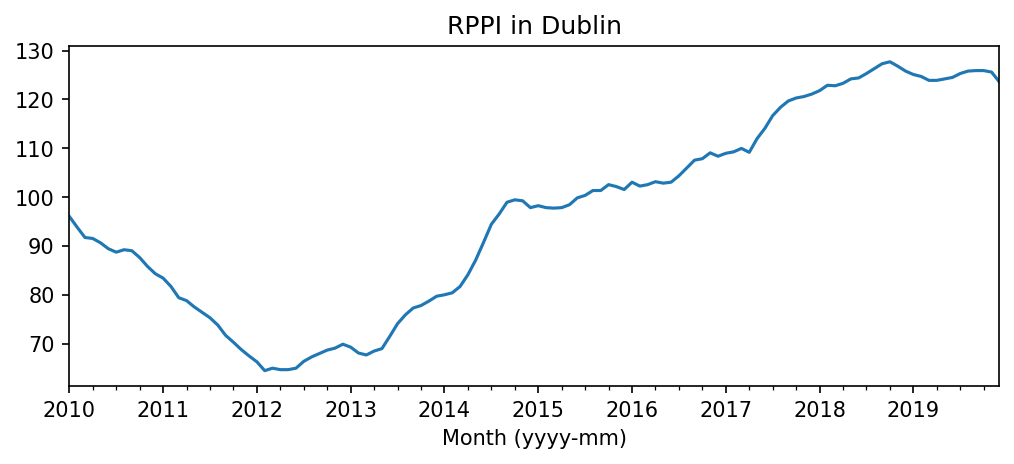

In [183]:
fig, ax = plt.subplots(figsize=(8,3), dpi=150)

df_time5.loc['Dublin - all residential properties', 'VALUE'].plot(ax=ax)

ax.set_title('RPPI in Dublin')
plt.show()

Again we perform a decomposition.

In [184]:
df_rppi.index = df_rppi.index.to_timestamp()

In [185]:
decomp_rppi = seasonal_decompose(df_rppi['VALUE'], model='multiplicative')

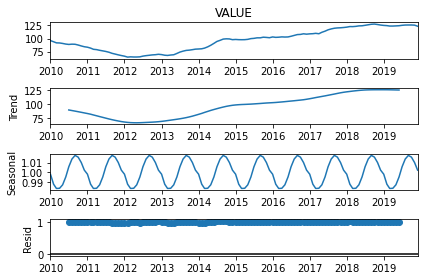

In [186]:
decomp_rppi.plot();

And we use auto_arima to find the optimal ARIMA model parameters.

In [187]:
auto_arima(df_rppi['VALUE'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(5, 2, 3)   Log Likelihood                -140.073
Date:                Wed, 18 Aug 2021   AIC                            300.146
Time:                        14:48:32   BIC                            327.853
Sample:                             0   HQIC                           311.396
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0034      0.036      0.094      0.925      -0.067       0.074
ar.L1          0.2568      0.361      0.711      0.477      -0.451       0.965
ar.L2          0.8721      0.496      1.758      0.079      -0.100       1.844
ar.L3         -0.4565      0.204     -2.239      0.025      -0.856      -0.057
ar.L4         -0.3670      0.159     -2.303      0.021      -0.679      -0.055
ar.L5         -0.1869      0.127     -1.467      0.143      -0.437       0.063
ma.L1         -0.7898      0.369     -2.139      0.032      -1.514      -0.066
ma.L2         -0.6595      0.665     -0.992      0.321      -1.963       0.644
ma.L3          0.9161      0.401      2.283      0.022       0.130       1.702
sigma2         0.6103      0.098      6.220      0.000       0.418       0.803
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 1.07
Prob(Q):                              0.70   Prob(JB):                         0.58
Heteroskedasticity (H):               0.93   Skew:                             0.23
Prob(H) (two-sided):                  0.82   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This time the recommended model is a bit more complicated - ARIMA(5,2,3). This reflects the fact that the evolution of the RPPI is more complicated.

In [188]:
# train-test split
train_rppi = df_rppi.loc[:'2017-12-01']
test_rppi = df_rppi.loc['2018-01-01':]

In [189]:
# creating and fitting the model with the train data
model_rppi = ARIMA(train_rppi['VALUE'], order=(5, 2, 3))
results_rppi = model_rppi.fit()
results_rppi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.VALUE   No. Observations:                   94
Model:                 ARIMA(5, 2, 3)   Log Likelihood                -116.248
Method:                       css-mle   S.D. of innovations              0.805
Date:                Wed, 18 Aug 2021   AIC                            252.495
Time:                        14:49:40   BIC                            277.928
Sample:                    03-01-2010   HQIC                           262.768
                         - 12-01-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0279      0.040      0.697      0.486      -0.051       0.106
ar.L1.D2.VALUE     0.9193      0.559      1.644      0.100      -0.177       2.015
ar.L2.D2.VALUE     0.0219      0.677      0.032      0.974      -1.306       1.350
ar.L3.D2.VALUE    -0.3207      0.177     -1.808      0.071      -0.668       0.027
ar.L4.D2.VALUE    -0.0572      0.213     -0.268      0.789      -0.476       0.361
ar.L5.D2.VALUE    -0.1956      0.128     -1.528      0.127      -0.446       0.055
ma.L1.D2.VALUE    -1.5189      0.580     -2.617      0.009      -2.657      -0.381
ma.L2.D2.VALUE     0.5848      1.014      0.577      0.564      -1.402       2.571
ma.L3.D2.VALUE     0.2359      0.575      0.411      0.681      -0.890       1.362
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8694           -0.4956j            1.0008           -0.0825
AR.2            0.8694           +0.4956j            1.0008            0.0825
AR.3           -1.5093           -0.0000j            1.5093           -0.5000
AR.4           -0.2609           -1.8205j            1.8391           -0.2727
AR.5           -0.2609           +1.8205j            1.8391            0.2727
MA.1            0.8783           -0.4791j            1.0004           -0.0795
MA.2            0.8783           +0.4791j            1.0004            0.0795
MA.3           -4.2358           -0.0000j            4.2358           -0.5000
-----------------------------------------------------------------------------
"""

In [190]:
# predicting the points in the test region
start_rppi=len(train_rppi)
end_rppi=len(train_rppi)+len(test_rppi)-1
predictions_rppi = results_rppi.predict(start=start_rppi, end=end_rppi, 
                                        dynamic=False, typ='levels').rename('ARIMA(5, 2, 3) Predictions')

In [191]:
# comparing predictions to actual values
for i in range(len(predictions_rppi)):
    print(f"predicted={predictions_rppi[i]:<11.10}, expected={test_rppi['VALUE'][i]}")

predicted=121.2334338, expected=121.8
predicted=121.4927111, expected=122.9
predicted=122.0811519, expected=122.8
predicted=123.1573815, expected=123.3
predicted=124.6483724, expected=124.2
predicted=126.5079229, expected=124.4
predicted=128.5331634, expected=125.3
predicted=130.5111653, expected=126.3
predicted=132.2297069, expected=127.3
predicted=133.5710095, expected=127.7
predicted=134.5110671, expected=126.8
predicted=135.1451379, expected=125.8
predicted=135.6518145, expected=125.1
predicted=136.2533026, expected=124.7
predicted=137.1516485, expected=123.9
predicted=138.4794385, expected=123.9
predicted=140.2628867, expected=124.2
predicted=142.4165699, expected=124.5
predicted=144.7650039, expected=125.3
predicted=147.0894916, expected=125.8
predicted=149.1851041, expected=125.9
predicted=150.9146906, expected=125.9
predicted=152.2445518, expected=125.6
predicted=153.2532453, expected=123.6


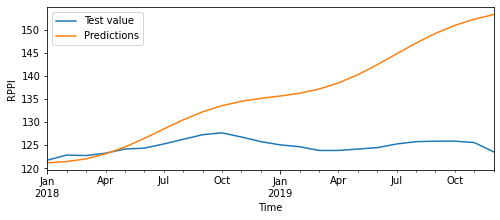

In [192]:
ax = test_rppi['VALUE'].plot(legend=True, figsize=(8,3), label='Test value')
predictions_rppi.plot(legend=True, label='Predictions')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel='Time', ylabel='RPPI');

In this case the performance is quite poor as seen in the plot above. This is also reflected in the values of the RMSE and MAE below. The reason is that in the last 2 years of the period the curve levels off, while it was preceded by many years of steady increase. Naturally, the model predicts that the increase will continue. No model could predict that the curve will level off based on the information available before that. In order to predict the true shape of the curve, we would have to regress on exogenous variables related to the state of the economy (such as demographics of the region, prices of building materials, inflation, etc.) and understand the causal mechanism by which the curve has been generated.

In [193]:
MSE_rppi = mean_squared_error(test_rppi['VALUE'], predictions_rppi)
MSE_rppi

210.10606039133222

In [194]:
RMSE_rppi = np.sqrt(MSE_rppi)
RMSE_rppi

14.495035715421064

In [195]:
MAE_rppi = mean_absolute_error(test_rppi['VALUE'], predictions_rppi)

In [196]:
MAE_rppi

11.248358955090753

In [197]:
test_rppi['VALUE'].median()

124.9

In [198]:
RMSE_rppi/test_rppi['VALUE'].median()

0.11605312822594926

In [199]:
MAE_rppi/test_rppi['VALUE'].median()

0.09005891877574662

As expected, the percentage error is too big. Despite the poor performance on the test data, we go on to fit the model to the full data and make a forecast for the next 2 years.

In [200]:
model_rppi = ARIMA(df_rppi['VALUE'], order=(5, 2, 3))
results_rppi = model_rppi.fit()
fcast_rppi = results_rppi.predict(len(df_rppi), len(df_rppi)+23, typ='levels').rename('ARIMA(5, 2, 3) Forecast')

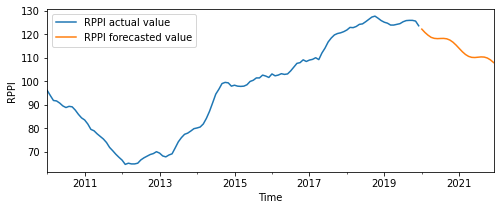

In [201]:
ax = df_rppi['VALUE'].plot(legend=True, figsize=(8,3), label='RPPI actual value')
fcast_rppi.plot(legend=True, label='RPPI forecasted value')
ax.autoscale(axis='x', tight=True)
ax.set(xlabel='Time', ylabel='RPPI');

This time the model takes into account the leveling off of the curve and predicts that the trend will reverse and the RPPI will start to decrease. This makes sense because markets are cyclical and 2019 is probably the peak of such a cycle.

Now we want to use these forecasts to predict the actual sales and the stamp duty.

In [202]:
fcast_Dub.head()

2020-01-01    317199.361345
2020-02-01    316648.722689
2020-03-01    316098.084034
2020-04-01    315547.445378
2020-05-01    314996.806723
Freq: MS, Name: ARIMA(0, 1, 0) Forecast, dtype: float64

In [203]:
fcast_rppi.head()

2020-01-01    122.171044
2020-02-01    120.746673
2020-03-01    119.585932
2020-04-01    118.660482
2020-05-01    118.239419
Freq: MS, Name: ARIMA(5, 2, 3) Forecast, dtype: float64

In [204]:
len(fcast_Dub), len(fcast_rppi)

(24, 24)

In [205]:
df_fcast = pd.DataFrame(fcast_Dub).merge(pd.DataFrame(fcast_rppi), how='inner', on=fcast_Dub.index)

In [206]:
df_fcast.columns

Index(['key_0', 'ARIMA(0, 1, 0) Forecast', 'ARIMA(5, 2, 3) Forecast'], dtype='object')

In [207]:
df_fcast.columns = ['Date yyyy-mm-dd', 'Price at Dec2019', 'RPPI']

In [208]:
df_fcast = df_fcast.set_index('Date yyyy-mm-dd')

In [209]:
df_fcast.head()

,Price at Dec2019,RPPI
Date yyyy-mm-dd,,
2020-01-01,317199.361345,122.171044
2020-02-01,316648.722689,120.746673
2020-03-01,316098.084034,119.585932
2020-04-01,315547.445378,118.660482
2020-05-01,314996.806723,118.239419


We combine the bare price and the RPPI to find the actual price.

In [210]:
df_fcast.loc[:, 'Actual price'] = df_fcast.apply(lambda x: np.round_(x['RPPI'] / rppi_Dec2019_Dublin * x['Price at Dec2019']), 
                                                 axis=1)

In [211]:
df_fcast.head()

,Price at Dec2019,RPPI,Actual price
Date yyyy-mm-dd,,,
2020-01-01,317199.361345,122.171044,313532.0
2020-02-01,316648.722689,120.746673,309339.0
2020-03-01,316098.084034,119.585932,305832.0
2020-04-01,315547.445378,118.660482,302937.0
2020-05-01,314996.806723,118.239419,301335.0


In [212]:
df_fcast.loc[:, 'Stamp duty'] = df_fcast.apply(lambda x: find_stamp_duty(x['Actual price']), axis=1)

In [213]:
df_fcast.head()

,Price at Dec2019,RPPI,Actual price,Stamp duty
Date yyyy-mm-dd,,,,
2020-01-01,317199.361345,122.171044,313532.0,2712.0
2020-02-01,316648.722689,120.746673,309339.0,2676.0
2020-03-01,316098.084034,119.585932,305832.0,2645.0
2020-04-01,315547.445378,118.660482,302937.0,2620.0
2020-05-01,314996.806723,118.239419,301335.0,2607.0


In [214]:
df.head()

,Address,County,Price (Euro),Not Full Market Price,VAT Exclusive,Description of Property,Date of Sale (yyyy-mm-dd),Price with VAT,RPPI,Price at Dec2019,Month of Sale (yyyy-mm),Log of Price,Z-score,Price without VAT,Stamp duty
0,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-01,343000.0,96.1,441153.0,2010-01,12.997147,0.292312,302203.0,2614.0
2,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,438500.0,96.1,563981.0,2010-01,13.242776,0.656633,386344.0,3342.0
3,"1 The Haven, Mornington",Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,400000.0,135.3,431338.0,2010-01,12.974647,0.968481,352423.0,3048.0
5,"12 Sallymount Avenue, Ranelagh",Dublin,425000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,425000.0,96.1,546618.0,2010-01,13.211505,0.610252,374449.0,3239.0
8,"15 Carriglawn, Waterpark, Carrigaline",Cork,180000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,180000.0,135.3,194102.0,2010-01,12.176139,-0.135197,158590.0,1372.0


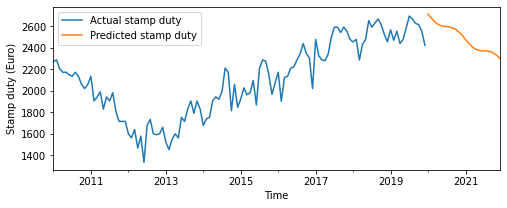

In [215]:
ax = df_stamp_Dub['Stamp duty'].plot(legend=True, figsize=(8,3), label='Actual stamp duty')
df_fcast['Stamp duty'].plot(legend=True, label='Predicted stamp duty')
ax.autoscale(axis='x', tight=True)
ax.set(xlabel='Time', ylabel='Stamp duty (Euro)');

Since the evolution of the stamp duty is not completely random, a forecasting model can capture the underlying trend and predict the future. However, such a forecast should be approached sceptically since it is based solely on the past behaviour of the stamp duty and not on any underlying causal model. In order to improve the forecast and make it more reliable, we would recommend to collect and record more information for the individual properties that have been sold - total area, age of the property, etc., and use these in order to stratify the feature space at a more fine-grained level. For example, we could look at all apartments in a certain region, at a certain area range, at a certain age range, and use past data for sales of this class of apartments to predict future sales of this class of apartments. In addition, it would be beneficial to find an economic model that causally generates the RPPI curve and use it to improve the forecast. Such a model would have to take into account the context in which the change of the RPPI happens and consider other important variables that can influence the sale price of properties, such as changes in the size, age and constitution of the regional population, the building activity in the region, etc. Finally, the model above does not take into account the influence of the Covid 19 pandemics which has been a major factor since the beginning of 2020 and could influence the sale prices.

#### Summary of the main results

Prices follow an approximate lognormal distribution - they are heavily skewed and have a long tail on the right (towards higher prices). They span several orders of magnitude - from $10^3$ to $10^8$ Euros. The shape of the distribution is approximately the same within different counties and for different types of apartments. 

Most of the recorded sales in the period 2010-2019 have happened in Dublin and are for second-hand properties. The prices tend to be higher in Dublin and for new properties.

Bare prices (excluding RPPI) tend to be approximately constant with time, with slight seasonal variation due to higher demand during the summer. The RPPI first decreases (2010-2013), then increases (2013-2018) and finally flattens (2018-2019).

Approximately $1$% of the data points have been flagged as outliers.

Combining two ARIMA models for bare sales and the RPPI gives a forecast for the future sales and hence the stamp duty for the next 2 years. However, the model is provisional and not completely reliable because it does not take into account the many additional external factors that could influence the prices.

#### Recommendations

Add older data (before 2010) in the forecasting. Collect data for the pandemic period and make a forecast for the post-pandemic period.

Collect more information for individual apartments and use that to increase the accuracy of the forecast for the bare price.

Use an economic model that takes into account external factors in order to improve the prediction of the RPPI.

Use the provided list of outliers in order to check for cases of tax avoidance (subnormal prices) and for sales that contain several apartments (supernormal prices). In the future, for each new price that is entered in the register, check if it is an outlier in real time, and if is, immediately check the sale.

### Appendix

#### Additional plots

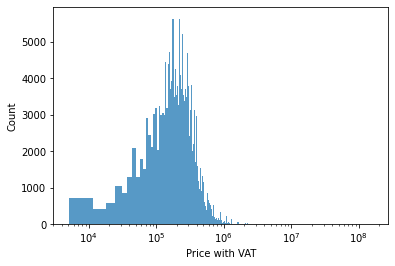

In [73]:
sns.histplot(data=df, x='Price with VAT')

plt.xscale('log')
plt.show()

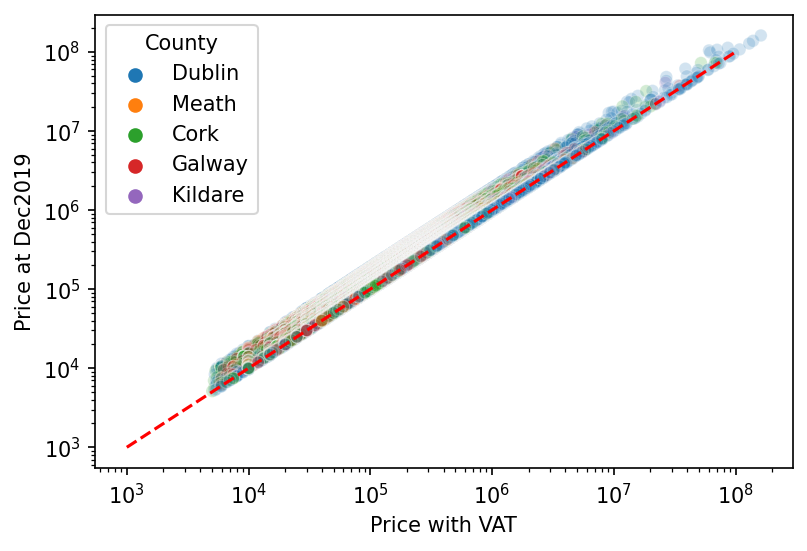

In [211]:
x_values = np.linspace(10**3, 10**8, 10)
y_values = x_values

fig, ax = plt.subplots(figsize=(6,4), dpi=150)
sns.scatterplot(data=df, x='Price with VAT', y='Price at Dec2019', hue='County', alpha=0.2, ax=ax)
ax.plot(x_values, y_values, color='red', linestyle='--')

plt.xscale('log')
plt.yscale('log')
plt.show()

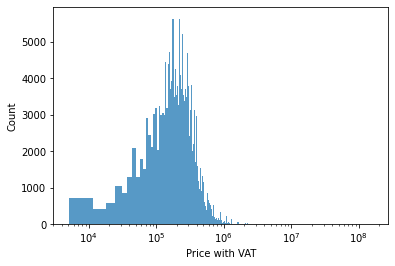

In [212]:
sns.histplot(data=df, x='Price with VAT')

plt.xscale('log')
plt.show()

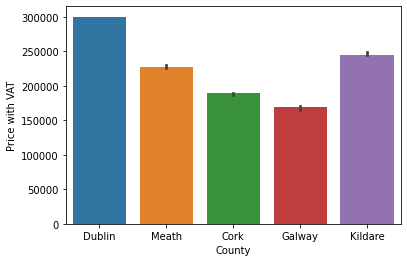

In [213]:
sns.barplot(data=df, x='County', y='Price with VAT', estimator=np.median);

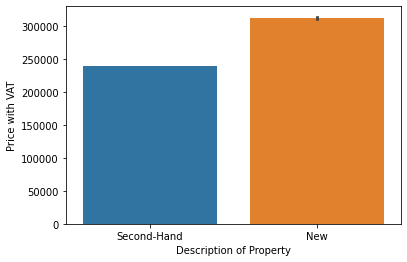

In [214]:
sns.barplot(data=df, x='Description of Property', y='Price with VAT', estimator=np.median)

plt.xticks([0,1], labels=['Second-Hand', 'New']);

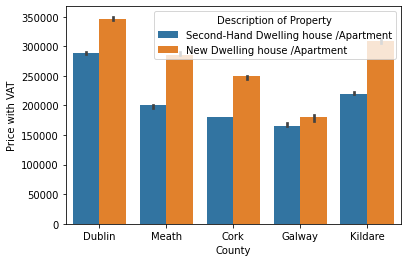

In [215]:
sns.barplot(data=df, x='County', y='Price with VAT', estimator=np.median, hue='Description of Property');

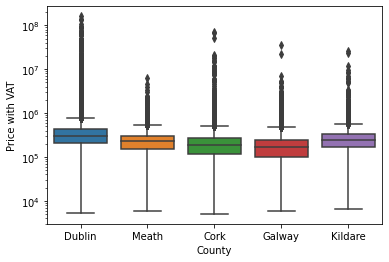

In [216]:
sns.boxplot(data=df, x='County', y='Price with VAT')

plt.yscale('log')
plt.show()

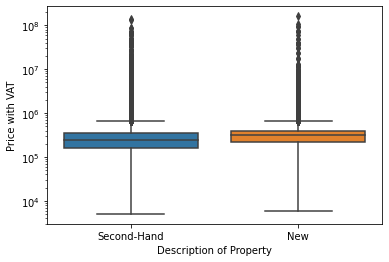

In [217]:
sns.boxplot(data=df, x='Description of Property', y='Price with VAT')

plt.yscale('log')
plt.xticks([0,1], labels=['Second-Hand', 'New'])
plt.show()

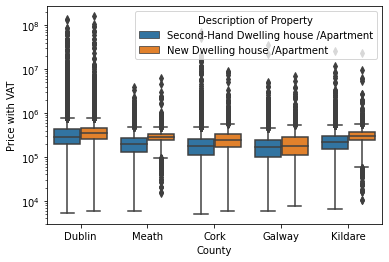

In [218]:
sns.boxplot(data=df, x='County', y='Price with VAT', hue='Description of Property')

plt.yscale('log')
plt.show()

#### Implementing an isolation forest algorithm for outlier detection

In [219]:
from sklearn.ensemble import IsolationForest

In [220]:
df.head()

,Address,County,Price (Euro),Not Full Market Price,VAT Exclusive,Description of Property,Date of Sale (yyyy-mm-dd),Price with VAT,RPPI,Price at Dec2019,Month of Sale (yyyy-mm),Log of Price,Z-score,Price without VAT,Stamp duty
0,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-01,343000.0,96.1,441153.0,2010-01,12.997147,0.292312,302203.0,2614.0
2,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,438500.0,96.1,563981.0,2010-01,13.242776,0.656633,386344.0,3342.0
3,"1 The Haven, Mornington",Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,400000.0,135.3,431338.0,2010-01,12.974647,0.968481,352423.0,3048.0
5,"12 Sallymount Avenue, Ranelagh",Dublin,425000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,425000.0,96.1,546618.0,2010-01,13.211505,0.610252,374449.0,3239.0
8,"15 Carriglawn, Waterpark, Carrigaline",Cork,180000.0,No,No,Second-Hand Dwelling house /Apartment,2010-01-04,180000.0,135.3,194102.0,2010-01,12.176139,-0.135197,158590.0,1372.0


In [221]:
X = df[['Log of Price', 'County', 'Description of Property']].copy()

In [222]:
X = pd.get_dummies(X, drop_first=True)

In [223]:
X.head()

,Log of Price,County_Dublin,County_Galway,County_Kildare,County_Meath,Description of Property_Second-Hand Dwelling house /Apartment
0,12.997147,1,0,0,0,1
2,13.242776,1,0,0,0,1
3,12.974647,0,0,0,1,1
5,13.211505,1,0,0,0,1
8,12.176139,0,0,0,0,1


In [224]:
from sklearn.preprocessing import StandardScaler

In [225]:
scaler = StandardScaler()

In [226]:
scaled_X = scaler.fit_transform(X)

In [227]:
scaled_X

array([[ 0.53920611,  0.87469305, -0.31146888, -0.3071863 , -0.27027653,
         0.47294713],
       [ 0.88833344,  0.87469305, -0.31146888, -0.3071863 , -0.27027653,
         0.47294713],
       [ 0.50722583, -1.1432582 , -0.31146888, -0.3071863 ,  3.69991425,
         0.47294713],
       ...,
       [-1.88757692,  0.87469305, -0.31146888, -0.3071863 , -0.27027653,
         0.47294713],
       [ 0.51104975,  0.87469305, -0.31146888, -0.3071863 , -0.27027653,
         0.47294713],
       [ 1.59158497,  0.87469305, -0.31146888, -0.3071863 , -0.27027653,
         0.47294713]])

In [228]:
iforest = IsolationForest(contamination=0.01, random_state=124)

In [229]:
pred = iforest.fit_predict(scaled_X)

In [230]:
len(X), len(pred)

(234266, 234266)

In [231]:
X.loc[:, 'In/Outliers'] = pred

In [232]:
X.sort_values('Log of Price')

,Log of Price,County_Dublin,County_Galway,County_Kildare,County_Meath,Description of Property_Second-Hand Dwelling house /Apartment,In/Outliers
358672,8.544030,0,0,0,0,1,1
307476,8.568456,1,0,0,0,1,-1
361059,8.591744,1,0,0,0,1,-1
4016,8.659387,0,0,0,0,1,1
369544,8.677780,1,0,0,0,1,-1
...,...,...,...,...,...,...,...
369867,18.493725,1,0,0,0,0,-1
114323,18.542544,1,0,0,0,1,1
378709,18.665531,1,0,0,0,1,1
316177,18.744719,1,0,0,0,1,1


In [233]:
X.corr()['In/Outliers']

Log of Price                                                     0.207068
County_Dublin                                                    0.064974
County_Galway                                                   -0.138819
County_Kildare                                                  -0.007128
County_Meath                                                    -0.038544
Description of Property_Second-Hand Dwelling house /Apartment    0.133389
In/Outliers                                                      1.000000
Name: In/Outliers, dtype: float64

In [234]:
X['In/Outliers'].value_counts()

 1    231930
-1      2336
Name: In/Outliers, dtype: int64

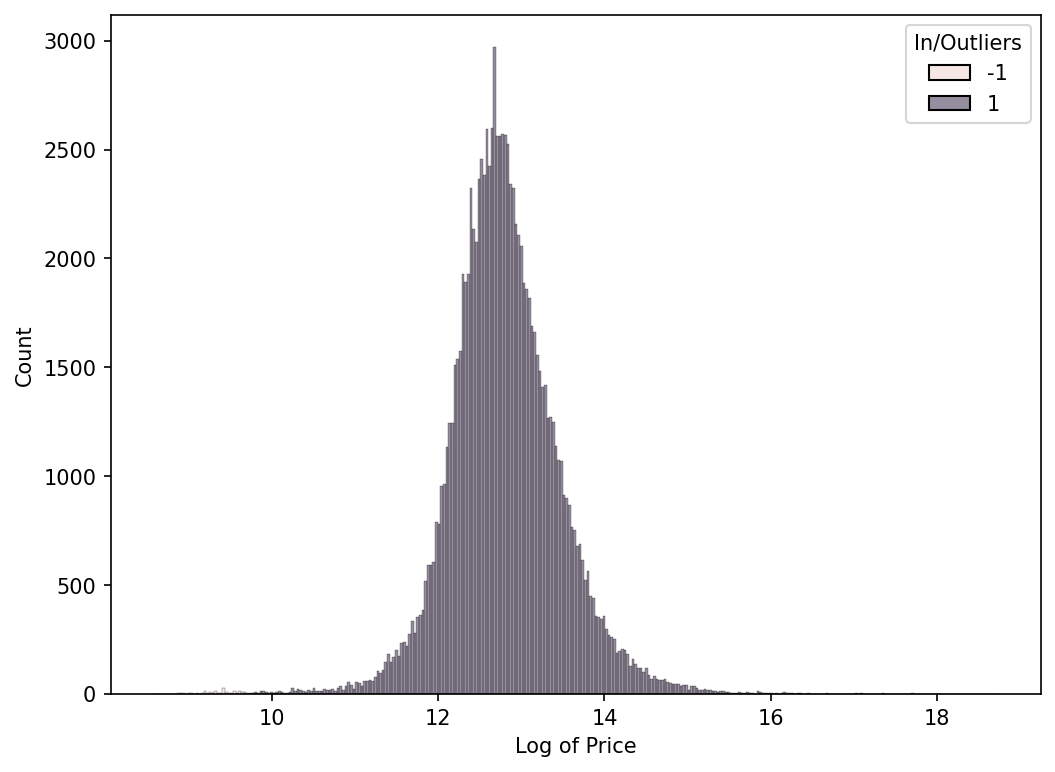

In [235]:
plt.figure(figsize=(8,6), dpi=150)
sns.histplot(data=X[(X['County_Dublin']==1)&(X['Description of Property_Second-Hand Dwelling house /Apartment']==1)], 
             x='Log of Price', hue='In/Outliers')

plt.show()

In [236]:
X[X['In/Outliers']==1]['Log of Price'].min(), X[X['In/Outliers']==1]['Log of Price'].max()

(8.544029845369797, 18.74471920051163)

In [237]:
X[X['In/Outliers']==-1]['Log of Price'].min(), X[X['In/Outliers']==-1]['Log of Price'].max()

(8.56845648535378, 18.899775510793006)

#### Using a K-means clustering algorithm to detect outliers

In [238]:
X = df[['Log of Price', 'County', 'Description of Property']].copy()

In [239]:
X = pd.get_dummies(X, drop_first=True)

In [240]:
X.head()

,Log of Price,County_Dublin,County_Galway,County_Kildare,County_Meath,Description of Property_Second-Hand Dwelling house /Apartment
0,12.997147,1,0,0,0,1
2,13.242776,1,0,0,0,1
3,12.974647,0,0,0,1,1
5,13.211505,1,0,0,0,1
8,12.176139,0,0,0,0,1


In [241]:
scaler = StandardScaler()

In [242]:
scaled_X = scaler.fit_transform(X)

In [243]:
from sklearn.cluster import KMeans

In [244]:
model = KMeans(n_clusters=3)

In [245]:
cluster_labels = model.fit_predict(scaled_X)

In [246]:
len(scaled_X), len(cluster_labels)

(234266, 234266)

In [247]:
X['Cluster'] = cluster_labels

In [248]:
X['Cluster'].value_counts()

0    193349
2     20717
1     20200
Name: Cluster, dtype: int64

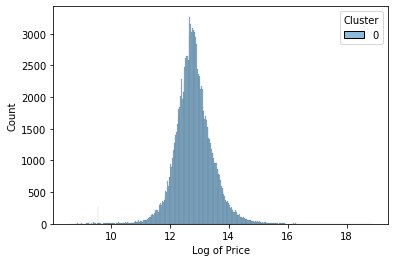

In [249]:
sns.histplot(data=X[X['County_Dublin']==1], x='Log of Price', hue='Cluster')

plt.show()

In [250]:
X[X['Cluster']==0]['Log of Price'].min(), X[X['Cluster']==0]['Log of Price'].max()

(8.544029845369797, 18.899775510793006)

In [251]:
X[X['Cluster']==1]['Log of Price'].min(), X[X['Cluster']==1]['Log of Price'].max()

(9.163772736159848, 17.525919260650696)

In [252]:
X[X['Cluster']==2]['Log of Price'].min(), X[X['Cluster']==2]['Log of Price'].max()

(8.729397122692061, 17.43484838290844)

#### ACF and PACF

In [253]:
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff

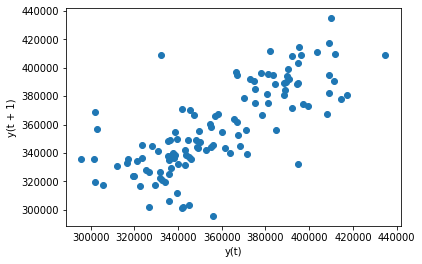

In [154]:
lag_plot(df_Dub['Price at Dec2019']);

In [257]:
df_Dub['d1'] = diff(df_Dub['Price at Dec2019'], k_diff=1)

In [258]:
df_Dub.head()

,Price at Dec2019,d1
Month of Sale (yyyy-mm),,
2010-01-01,383276.0,NaN
2010-02-01,394888.0,11612.0
2010-03-01,389111.0,-5777.0
2010-04-01,384563.0,-4548.0
2010-05-01,388379.0,3816.0


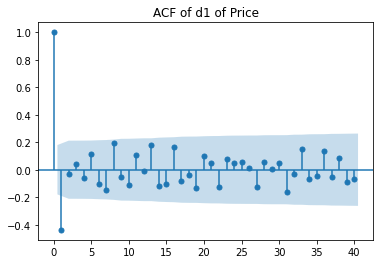

In [265]:
plot_acf(df_Dub['d1'].iloc[1:], title='ACF of d1 of Price', lags=40);

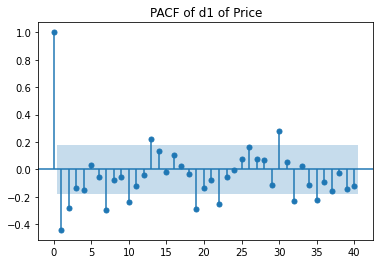

In [272]:
plot_pacf(df_Dub['d1'].iloc[1:], title='PACF of d1 of Price', lags=40);

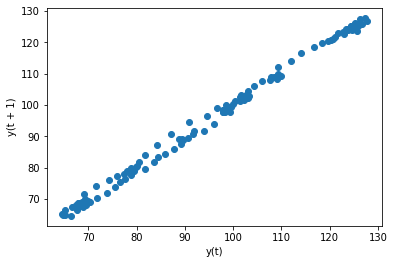

In [180]:
lag_plot(df_rppi['VALUE']);

In [284]:
df_rppi['d2'] = diff(df_rppi['VALUE'], k_diff=2)

In [285]:
df_rppi.head()

,VALUE,d2
Month (yyyy-mm),,
2010-01-01,96.1,NaN
2010-02-01,93.9,NaN
2010-03-01,91.8,0.1
2010-04-01,91.6,1.9
2010-05-01,90.7,-0.7


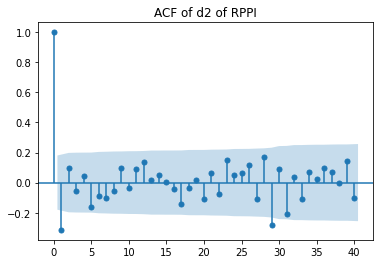

In [291]:
plot_acf(df_rppi['d2'].iloc[2:], title='ACF of d2 of RPPI', lags=40);

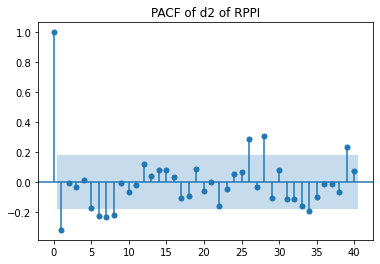

In [292]:
plot_pacf(df_rppi['d2'].iloc[2:], title='PACF of d2 of RPPI', lags=40);